17/01/2020





























# Al Khobar Rentability Study

By **Bader Ababtain** 

## Introduction
When you try to build a real estate project, one of the biggest questions is location and whether you will be able to rent spaces in that location or not. Location selection could be one of the biggest challenges in a real estate business as depending on that location would end up with a rentable place or not. Given that location selection is an important aspect of any real estate project, we shall study the rentability of a store given its location in the small city of Al Khobar in Saudi Arabia. 

## Data Selection
Obtaining the data was not an easy task as most of the needed data was not readily available. I had to find the location data for each neighborhood in my city which was not an easy search but I finally found it here(https://github.com/usefksa/Saudi_GIS_Data). Using the foursquare data as rented places, I had to also the data for the unrented or available spaces which I scrapped one of the most famous sites in Saudi Arabia for renting a place(https://sa.Aqar.fm) as shown below.

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge PyShp --yes 
# uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#import PyShp
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import fiona
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
print('Libraries imported.')

Libraries imported.


In [233]:
title=[]
price=[]
size=[]
for i in range(1,15):
    url= 'https://sa.aqar.fm/%D9%85%D8%AD%D9%84%D8%A7%D8%AA-%D9%84%D9%84%D8%A5%D9%8A%D8%AC%D8%A7%D8%B1/%D8%A7%D9%84%D8%AE%D8%A8%D8%B1/{}'.format(i)
    source=requests.get(url).text
    soup = BeautifulSoup(source,'lxml')
    soup.prettify()
    table=soup.findAll('p')
    len(table)

    for t in soup.findAll('a',class_='listTitle',text =True):
        title.append(t.text)

    for t in soup.findAll('span',class_='price',text =True):
        price.append(t.text)

    for t in soup.findAll('span',class_='size',text =True):
        size.append(t.text)
data_aqar=pd.DataFrame([np.array(title),np.array(price),np.array(size)])
data_aqar.transpose()

0               1  \
0    محل للإيجار في الشارع الثلاثين ، حي الخبر الجن...     15,000 ريال   
1    محل للإيجار في شارع الامير فهد ، حي الخبر الشم...     95,000 ريال   
2                       محل للإيجار في شارع بدر, الخبر     20,000 ريال   
3          محل للإيجار في الشارع الرابع, الثقبة, الخبر     22,000 ريال   
4    محل للإيجار في شارع صلاح الدين االايوبي ، حي ا...     40,000 ريال   
5    محل للإيجار في شارع الامير فهد ، حي الخبر الشم...     16,000 ريال   
6    محل للإيجار في شارع الامير بندر بن عبد العزيز ...     80,000 ريال   
7    محل للإيجار في شارع العاشر ، حي العقربية ، الخ...     60,000 ريال   
8    محل للإيجار في طريق الملك فهد بن عبدالعزيز ، ح...     85,000 ريال   
9    محل للإيجار في الشارع الثاني والعشرون ، حي الخ...     75,000 ريال   
10   محل للإيجار في طريق الملك فهد ، حي الخبر الجنو...    130,000 ريال   
11   محل للإيجار في شارع الامير فهد ، حي الخبر الشم...    200,000 ريال   
12   محل للإيجار في شارع الامير نايف ، حي الخبر الش...     26,000 ريال   
13   محل للإيجار في الشارع الثاني والعشرون ، حي الخ...     70,000 ريال   
14   محل للإيجار في شارع الأمير حمود ، حي مدينة الع...    120,000 ريال   
15   محل للإيجار في طريق الملك فهد بن عبد العزيز ، ...    192,000 ريال   
16   محل للإيجار في شارع الامير فواز ، حي الخبر الش...     11,000 ريال   
17   محل للإيجار في شارع الامير فواز ، حي الخبر الش...     35,000 ريال   
18   محل للإيجار في شارع الامير فواز ، حي الخبر الش...     11,000 ريال   
19   محل للإيجار في طريق الملك عبدالعزيز ، حي مدينة...    150,000 ريال   
20   محل للإيجار في شارع الامير فواز ، حي الخبر الش...     15,000 ريال   
21   محل للإيجار في شارع الأمير مساعد ، حي الخبر ال...     80,000 ريال   
22        محل للإيجار في شارع رابغ ، حي الثقبة ، الخبر     40,000 ريال   
23   محل للإيجار في الشارع العاشر ، حي العقربية ، ا...     40,000 ريال   
24   محل للإيجار في شارع الامير سلمان, الخبر الشمال...     45,000 ريال   
25   محل للإيجار في الشارع العشرين, الخبر الجنوبية,...     70,000 ريال   
26      محل للإيجار في شارع الرياض ، حي الثقبة ، الخبر     14,000 ريال   
27        محل للإيجار في شارع رابغ ، حي الثقبة ، الخبر     16,000 ريال   
28   محل للإيجار في شارع الامير تركي ، حي الكورنيش ...    529,100 ريال   
29   محل للإيجار في شارع مكة المكرمة ، حي صناعية ال...     70,000 ريال   
30   محل للإيجار في شارع الامير تركي ، حي الكورنيش ...    141,050 ريال   
31   محل للإيجار في الشارع الثاني والعشرون ، حي الخ...    120,000 ريال   
32                  محل للإيجار في حي العقربية ، الخبر     60,000 ريال   
33   محل للإيجار في شارع الملك سعود ، حي الخبر الشم...     35,000 ريال   
34       محل للإيجار في شارع 14 ا ، حي الخزامى ، الخبر     37,000 ريال   
35   محل للإيجار في طريق الملك فهد بن عبد العزيز ، ...    190,000 ريال   
36   محل للإيجار في شارع عبدالرحمن بن معاذ ، حي الج...     45,000 ريال   
37       محل للإيجار في شارع بكر القشيري, الجسر, الخبر     28,000 ريال   
38       محل للإيجار في شارع 14 ا ، حي الخزامى ، الخبر     35,000 ريال   
39   محل للإيجار في شارع الامير ماجد بن عبد العزيز,...    100,000 ريال   
40   محل للإيجار في طريق مجلس التعاون ، حي الخزامى ...     15,000 ريال   
41   محل للإيجار في شارع ابو عبد الرحمن بن عقيل ، ح...     24,000 ريال   
42   محل للإيجار في شارع الامير نايف ، حي الخبر الش...     22,000 ريال   
43   محل للإيجار في شارع ابو عبد الرحمن بن عقيل ، ح...    100,000 ريال   
44   محل للإيجار في طريق خادم الحرمين الشريفين ، حي...    350,000 ريال   
45   محل للإيجار في شارع يونس بن الاعلى ، حي الراكة...     35,000 ريال   
46   محل للإيجار في طريق الملك عبدالعزيز ، حي الخبر...    300,000 ريال   
47   محل للإيجار في شارع العاشر ، حي العقربية ، الخ...     25,000 ريال   
48            محل للإيجار في حي العليا ، الخبر ، الخبر    100,000 ريال   
49   محل للإيجار في شارع الامير نايف ، حي الخبر الش...     10,000 ريال   
50              محل للإيجار في شارع الأمير نايف, الخبر     19,000 ريال   
51   محل للإيجار في شارع السادس عشر ، حي العقربية ،...     22,000 ريال   
52   محل للإيجار في شارع الامير بندر بن عبد العزيز ...     15,000 ريال   
53   محل للإيجار في شارع العاشر ، حي العقربية ، الخ...   

In [234]:
data_aqar=data_aqar.T
data_aqar.rename({0:'Address',1:'Price',2:'Area'},axis=1,inplace=True)
data_aqar.head()

Address        Price    Area
0  محل للإيجار في الشارع الثلاثين ، حي الخبر الجن...  15,000 ريال   40 م²
1  محل للإيجار في شارع الامير فهد ، حي الخبر الشم...  95,000 ريال   96 م²
2                     محل للإيجار في شارع بدر, الخبر  20,000 ريال   25 م²
3        محل للإيجار في الشارع الرابع, الثقبة, الخبر  22,000 ريال   43 م²
4  محل للإيجار في شارع صلاح الدين االايوبي ، حي ا...  40,000 ريال  900 م²

In [235]:
data_aqar.to_csv('aqar_data.csv')

Since the neighborhood data was SQL file I had to unpack it using the following website (https://sqliteonline.com/) and then copy it to a CSV file.

In [176]:
df_n = pd.read_csv('D:\Maps of Saudi Arabia\Saudi_GIS_Data-master\sa_neighborhoods.csv')
df_c = pd.read_csv('D:\Maps of Saudi Arabia\Saudi_GIS_Data-master\sa_cities.csv')

 As for the Foursquare data, we have obtained it using the following code:

In [556]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200115' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WEU3EY4YU2LBSKYGLNXVLYTTXGB5YCCM5042VOH3SVGKHPXX
CLIENT_SECRET:BPZW5DD4P2NMSWTZTGFN42JP4U5YNMV0TPQMUMKPBOWNRSCI


In [557]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    venues_list_test=[]
    venues_list=[]
    for i,name, lat, lng in zip(range(len(names)),names, latitudes, longitudes):
        print(name)
        LIMIT=200    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        
            
        venues_list.append([( name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])


        
  
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [559]:
khobar_venues = getNearbyVenues(names=df_khobar[' nameEn_x'],
                                   latitudes=df_khobar['avg_lat'],
                                   longitudes=df_khobar['avg_lng']
                                  )


 at tahliyah
 ibn sina
 al hizam al akhdar
 sinaiyah ath thuqbah
 at taawn
 ar rakah al janubiyah
 al khubar ash shamaliyah
 madinat al ummal
 al aqrabiyah
 al khubar al janubiyah
 ar rawabi
 al yarmok
 qurtubah
 al jawharah
 al hizam adh dhahabi
 al andalus
 al hada
 al bandariyah
 al bustan
 ath thuqbah
 al ulaya
 al iskan
 al hamra
 al jisr
 al khuzama
 sporting city
 al bahar
 al kurnaish
 sinaiyah al foaziah
 as sahil
 al khawr
 ishbiliya
 al buhayrah
 ash sheraa
 al kawthar
 ar raja
 as sawari
 al aqiq
 al maha
 al amwaj
 al lulu
 al murjan
 as sufun


In [560]:
khobar_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
 al amwaj                                      6                       6   
 al andalus                                   63                      63   
 al aqiq                                       6                       6   
 al aqrabiyah                                100                     100   
 al bahar                                     10                      10   
 al bandariyah                               100                     100   
 al buhayrah                                  62                      62   
 al bustan                                   100                     100   
 al hada                                     100                     100   
 al hamra                                     42                      42   
 al hizam adh dhahabi                        100                     100   
 al hizam al akhdar                          100                     100   
 al iskan                                     66                      66   
 al jawharah                                  81                      81   
 al jisr                                     100                     100   
 al kawthar                                    6                       6   
 al khawr                                     26                      26   
 al khubar al janubiyah                      100                     100   
 al khubar ash shamaliyah                    100                     100   
 al khuzama                                   89                      89   
 al kurnaish                                 100                     100   
 al lulu                                       1                       1   
 al maha                                       5                       5   
 al murjan                                     3                       3   
 al ulaya                                    100                     100   
 al yarmok                                   100                     100   
 ar raja                                       4                       4   
 ar rakah al janubiyah                        95                      95   
 ar rawabi                                   100                     100   
 as sahil                                     48                      48   
 as sawari                                    24                      24   
 as sufun                                      4                       4   
 ash sheraa                                   13                      13   
 at taawn                                     56                      56   
 at tahliyah                                   7                       7   
 ath thuqbah                                  67                      67   
 ibn sina                                     31                      31   
 ishbiliya                                    38                      38   
 madinat al ummal                            100                     100   
 qurtubah                                     92                      92   
 sinaiyah al foaziah                          19                      19   
 sinaiyah ath thuqbah                         27                      27   
 sporting city                                70                      70   

                           Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                        
 al amwaj                      6               6                6   
 al andalus                   63              63               63   
 al aqiq                       6               6                6   
 al aqrabiyah                100             100              100   
 al bahar                     10              10               10   
 al bandariyah               100             100              100   
 al buhayrah                  62              62      

Remove duplicates

In [561]:
unique=khobar_venues[['Venue Category','Venue','Venue Latitude','Venue Longitude']].drop_duplicates()
print(unique.shape,khobar_venues.shape)
unique=khobar_venues.loc[khobar_venues[['Venue Category','Venue','Venue Latitude','Venue Longitude']].duplicated(), ['Venue Category','Venue','Venue Latitude','Venue Longitude','Neighborhood','Neighborhood Latitude','Neighborhood Longitude']] 
print(unique.shape,khobar_venues.shape)

(1438, 4) (2461, 7)
(1023, 7) (2461, 7)


In [562]:
unique= pd.concat([khobar_venues, unique, unique]).drop_duplicates(keep=False)
print(unique.shape,khobar_venues.shape)

(1438, 7) (2461, 7)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Data Processing
In this section we will process the data untill it reaches a state where we can model it.

In [178]:

df_n.rename({' cityId':'cityId'}, inplace=True,axis=1)

In [167]:
df_c.rename({'id':'cityId'}, inplace=True,axis=1)
df_c['cityId']= df_c['cityId'].astype(str)

We first merge the neighbothood data with the city data

In [207]:

df_merged=df_n.merge(df_c,on='cityId',how='outer')

In [208]:
df_merged

id                              nameAr_x  \
0                                  28                                المنهل   
1                                  29                                 النصب   
2                                  30                           وسط المدينة   
3                                  31                                النزهة   
4                                  32                                   ذرة   
5                                  33                                 شمسان   
6                                  34                                 القرى   
7                                  35                              الوردتين   
8                                  36                                الربوة   
9                                  37                                النسيم   
10                                 38                               الاندلس   
11                                 39                         ابهاء الجديدة   
12                                 40                                الضباب   
13                                 41                               الوصايف   
14                                 42                               الشرفية   
15                                 43                              العزيزية   
16                                 44                                الشفاء   
17                                 45                              المفتاحة   
18                                 46                               السروات   
19                                 47                                المروج   
20                                 48                                  السد   
21                                 49                                 الخشع   
22                                 50                                القابل   
23                                 51                              الفيصلية   
24                                 52                              الخالدية   
25                                 53                                العرين   
26                                 56                                الواحة   
27                                 57                                  السد   
28                                 58                               الجزيرة   
29                                 59                             طيب الاسم   
30                                 60                                الزهور   
31                                 61                                الروضة   
32                                 62                               المنتزه   
33                                 64                                   ضمك   
34                                 65                                الخزان   
35                                 66                              الخالدية   
36                                 74                                 الفتح   
37                                 75                                النهضة   
38                                 76                                 شباعة   
39                                 77                               المعزاب   
40                                 78                               المثناة   
41                                 79                              المعمورة   
42                                 80                                النسيم   
43                                 81                                   شكر   
44                                 82                                النزهة   
45                                 83                                  عتود   
46                                 84                              ال هميلة   
47                                 85                         العرق الجنوبي   
48                                 86                                الصقور   
49                                 87                               البوادي   
50    

Then we select for Al Khobar city as it is the city we are interested in.

In [209]:
df_khobar=df_merged['cityId']=='31'
df_khobar=df_merged[df_khobar]
df_khobar.tail()

id  nameAr_x    nameEn_x cityId        neLat        neLng      swLat  \
1201  1440     المها     al maha     31  26.19961402  50.14119764  26.176525   
1202  1441   الامواج    al amwaj     31  26.15549338  50.16252992  26.127386   
1203  1442    اللؤلؤ     al lulu     31  26.13309847  50.15886972  26.103818   
1204  1443   المرجان   al murjan     31  26.13919068  50.13010731  26.087782   
1205  1444     السفن    as sufun     31  26.17963536  50.17777501  26.090273   

            swlng  nameAr_y    nameEn_y   provinceId  
1201  50.12437667     الخبر   Al Khubar         13.0  
1202  50.12896566     الخبر   Al Khubar         13.0  
1203  50.12802717     الخبر   Al Khubar         13.0  
1204   50.0978419     الخبر   Al Khubar         13.0  
1205  50.15650321     الخبر   Al Khubar         13.0

In [210]:
df_khobar

id           nameAr_x                   nameEn_x cityId        neLat  \
1163  1291            التحلية                at tahliyah     31  26.20104134   
1164  1292          ابن سيناء                   ibn sina     31  26.25028821   
1165  1293      الحزام الاخضر         al hizam al akhdar     31  26.31265178   
1166  1294      صناعية الثقبة       sinaiyah ath thuqbah     31  26.26287587   
1167  1295            التعاون                   at taawn     31  26.24200094   
1168  1296    الراكة الجنوبية      ar rakah al janubiyah     31  26.36622151   
1169  1297     الخبر الشمالية   al khubar ash shamaliyah     31  26.30216507   
1170  1298       مدينة العمال           madinat al ummal     31  26.30344724   
1171  1299           العقربية               al aqrabiyah     31  26.30616927   
1172  1300     الخبر الجنوبية     al khubar al janubiyah     31  26.28335836   
1173  1301            الروابي                  ar rawabi     31  26.33842863   
1174  1302            اليرموك                  al yarmok     31  26.32253987   
1175  1303              قرطبة                   qurtubah     31  26.35376942   
1176  1304            الجوهرة                al jawharah     31  26.33616944   
1177  1305      الحزام الذهبي       al hizam adh dhahabi     31  26.32462541   
1178  1306            الاندلس                 al andalus     31  26.33381085   
1179  1307              الهدا                    al hada     31  26.31454687   
1180  1308           البندرية              al bandariyah     31  26.31721857   
1181  1309            البستان                  al bustan     31    26.326345   
1182  1310             الثقبة                ath thuqbah     31  26.28976653   
1183  1311             العليا                   al ulaya     31  26.30773693   
1184  1312            الاسكان                   al iskan     31    26.265847   
1185  1313            الحمراء                   al hamra     31  26.23511782   
1186  1314              الجسر                    al jisr     31  26.21886251   
1187  1315            الخزامى                 al khuzama     31  26.21737346   
1188  1325   المدينة الرياضية              sporting city     31  26.37018832   
1189  1412              البحر                   al bahar     31  26.36646986   
1190  1429           الكورنيش                al kurnaish     31  26.34005295   
1191  1430    صناعية الفوازية        sinaiyah al foaziah     31   26.2506688   
1192  1431             الساحل                   as sahil     31  26.27850352   
1193  1432              الخور                   al khawr     31  26.23581349   
1194  1433            اشبيليا                  ishbiliya     31  26.21942905   
1195  1434            البحيرة                al buhayrah     31  26.20089556   
1196  1435             الشراع                 ash sheraa     31  26.17633935   
1197  1436             الكوثر                 al kawthar     31  26.15863868   
1198  1437             الرجاء                    ar raja     31  26.17903542   
1199  1438            الصواري                  as sawari     31  26.19901329   
1200  1439             العقيق                    al aqiq     31  26.11017167   
1201  1440              المها                    al maha     31  26.19961402   
1202  1441            الامواج                   al amwaj     31  26.15549338   
1203  1442             اللؤلؤ                    al lulu     31  26.13309847   
1204  1443            المرجان                  al murjan     31  26.13919068   
1205  1444              السفن                   as sufun     31  26.17963536   

            neLng      swLat        swlng  nameAr_y    nameEn_y   provinceId  
1163  50.21687308  26.150779  50.17741844     الخبر   Al Khubar         13.0  
1164  50.21463359  26.233414  50.19496247     الخبر   Al Khubar         13.0  
1165  50.21157009  26.302165  50.19048766     الخبر   Al Khubar         13.0  
1166  50.20528629  26.248919  50.19175368     الخبر   Al Khubar         13.0  
1167  50.19703586  26.213543  50.17240977     الخبر   Al Khubar         13.0  
1168  50.2120

In [3]:
df_khobar.to_csv('D:\Maps of Saudi Arabia\Saudi_GIS_Data-master\Alkhobar_neighborhoods.csv')
df_khobar=pd.read_csv('D:\Maps of Saudi Arabia\Saudi_GIS_Data-master\Alkhobar_neighborhoods.csv')

In [4]:
df_aqar=pd.read_csv(r'D:\Real Estate\aqar_data.csv')


In [5]:
df_aqar.drop('Unnamed: 0',inplace=True,axis=1)
df_aqar.head()

Address        Price    Area
0  محل للإيجار في الشارع الثلاثين ، حي الخبر الجن...  15,000 ريال   40 م²
1  محل للإيجار في شارع الامير فهد ، حي الخبر الشم...  95,000 ريال   96 م²
2                     محل للإيجار في شارع بدر, الخبر  20,000 ريال   25 م²
3        محل للإيجار في الشارع الرابع, الثقبة, الخبر  22,000 ريال   43 م²
4  محل للإيجار في شارع صلاح الدين االايوبي ، حي ا...  40,000 ريال  900 م²

Now, we do a fuzzy match between the aqar data and Al Khobar data in order to obtain the approximate coordinates of each listing

In [244]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process
import fuzzywuzzy
from fuzzywuzzy import fuzz

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.partial_ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)



In [274]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name,i in zip(df_aqar.Address,range(len(df_aqar))):
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, df_khobar[' nameAr_x'], 70)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"Address" : name})
    dict_.update({" nameAr_x" : match[0]})
    dict_.update({"Price" : df_aqar.Price[i]})
    dict_.update({"Area" : df_aqar.Area[i]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results
merge_table

Address          nameAr_x  \
0    محل للإيجار في الشارع الثلاثين ، حي الخبر الجن...    الخبر الجنوبية   
1    محل للإيجار في شارع الامير فهد ، حي الخبر الشم...    الخبر الشمالية   
2                       محل للإيجار في شارع بدر, الخبر             البحر   
3          محل للإيجار في الشارع الرابع, الثقبة, الخبر            الثقبة   
4    محل للإيجار في شارع صلاح الدين االايوبي ، حي ا...           الاندلس   
5    محل للإيجار في شارع الامير فهد ، حي الخبر الشم...    الخبر الشمالية   
6    محل للإيجار في شارع الامير بندر بن عبد العزيز ...    الخبر الشمالية   
7    محل للإيجار في شارع العاشر ، حي العقربية ، الخ...          العقربية   
8    محل للإيجار في طريق الملك فهد بن عبدالعزيز ، ح...             الجسر   
9    محل للإيجار في الشارع الثاني والعشرون ، حي الخ...    الخبر الشمالية   
10   محل للإيجار في طريق الملك فهد ، حي الخبر الجنو...    الخبر الجنوبية   
11   محل للإيجار في شارع الامير فهد ، حي الخبر الشم...    الخبر الشمالية   
12   محل للإيجار في شارع الامير نايف ، حي الخبر الش...    الخبر الشمالية   
13   محل للإيجار في الشارع الثاني والعشرون ، حي الخ...    الخبر الشمالية   
14   محل للإيجار في شارع الأمير حمود ، حي مدينة الع...      مدينة العمال   
15   محل للإيجار في طريق الملك فهد بن عبد العزيز ، ...   الراكة الجنوبية   
16   محل للإيجار في شارع الامير فواز ، حي الخبر الش...    الخبر الشمالية   
17   محل للإيجار في شارع الامير فواز ، حي الخبر الش...    الخبر الشمالية   
18   محل للإيجار في شارع الامير فواز ، حي الخبر الش...    الخبر الشمالية   
19   محل للإيجار في طريق الملك عبدالعزيز ، حي مدينة...      مدينة العمال   
20   محل للإيجار في شارع الامير فواز ، حي الخبر الش...    الخبر الشمالية   
21   محل للإيجار في شارع الأمير مساعد ، حي الخبر ال...    الخبر الشمالية   
22        محل للإيجار في شارع رابغ ، حي الثقبة ، الخبر            الثقبة   
23   محل للإيجار في الشارع العاشر ، حي العقربية ، ا...          العقربية   
24   محل للإيجار في شارع الامير سلمان, الخبر الشمال...    الخبر الشمالية   
25   محل للإيجار في الشارع العشرين, الخبر الجنوبية,...    الخبر الجنوبية   
26      محل للإيجار في شارع الرياض ، حي الثقبة ، الخبر            الثقبة   
27        محل للإيجار في شارع رابغ ، حي الثقبة ، الخبر            الثقبة   
28   محل للإيجار في شارع الامير تركي ، حي الكورنيش ...          الكورنيش   
29   محل للإيجار في شارع مكة المكرمة ، حي صناعية ال...     صناعية الثقبة   
30   محل للإيجار في شارع الامير تركي ، حي الكورنيش ...          الكورنيش   
31   محل للإيجار في الشارع الثاني والعشرون ، حي الخ...    الخبر الشمالية   
32                  محل للإيجار في حي العقربية ، الخبر          العقربية   
33   محل للإيجار في شارع الملك سعود ، حي الخبر الشم...    الخبر الشمالية   
34       محل للإيجار في شارع 14 ا ، حي الخزامى ، الخبر           الخزامى   
35   محل للإيجار في طريق الملك فهد بن عبد العزيز ، ...   الراكة الجنوبية   
36   محل للإيجار في شارع عبدالرحمن بن معاذ ، حي الج...             الجسر   
37       محل للإيجار في شارع بكر القشيري, الجسر, الخبر             الجسر   
38       محل للإيجار في شارع 14 ا ، حي الخزامى ، الخبر           الخزامى   
39   محل للإيجار في شارع الامير ماجد بن عبد العزيز,...    الخبر الشمالية   
40   محل للإيجار في طريق مجلس التعاون ، حي الخزامى ...           التعاون   
41   محل للإيجار في شارع ابو عبد الرحمن بن عقيل ، ح...           الخزامى   
42   محل للإيجار في شارع الامير نايف ، حي الخبر الش...    الخبر الشمالية   
43   محل للإيجار في شارع ابو عبد الرحمن بن عقيل ، ح...           الخزامى   
44   محل للإيجار في طريق خادم الحرمين الشريفين ، حي...          العقربية   
45   محل للإيجار في شارع يونس بن الاعلى ، حي الراكة...   الراكة الجنوبية   
46   محل للإيجار في طريق الملك عبدالعزيز ، حي الخبر...    الخبر الشمالية   
47   محل للإيجار في شارع العاشر ، حي العقربية ، الخ...          العقربية   
48            محل للإيجار في حي العليا ، الخبر ، الخبر            العليا   
49   محل للإيجار في شارع الامير نايف ، حي الخبر الش...    الخبر الشمالية   
50              محل للإيجار في شارع الأمير نايف, الخبر             البحر   
51   محل للإيجار في شارع السادس عشر ، حي العقربية ،...          العقربية   
52   محل للإيجار في

In [275]:
data_df = merge_table.merge(df_khobar,on=' nameAr_x',how='left')

In [ ]:
z=data_df.groupby(' nameEn_x').count()

In [267]:
data_df.to_csv('aqar_data_with_coordinates_and_neighborhood')

In [134]:
data_df=pd.read_csv('aqar_data_with_coordinates_and_neighborhood')
df_khobar


Unnamed: 0    id           nameAr_x                   nameEn_x  cityId  \
0            0  1291            التحلية                at tahliyah      31   
1            1  1292          ابن سيناء                   ibn sina      31   
2            2  1293      الحزام الاخضر         al hizam al akhdar      31   
3            3  1294      صناعية الثقبة       sinaiyah ath thuqbah      31   
4            4  1295            التعاون                   at taawn      31   
5            5  1296    الراكة الجنوبية      ar rakah al janubiyah      31   
6            6  1297     الخبر الشمالية   al khubar ash shamaliyah      31   
7            7  1298       مدينة العمال           madinat al ummal      31   
8            8  1299           العقربية               al aqrabiyah      31   
9            9  1300     الخبر الجنوبية     al khubar al janubiyah      31   
10          10  1301            الروابي                  ar rawabi      31   
11          11  1302            اليرموك                  al yarmok      31   
12          12  1303              قرطبة                   qurtubah      31   
13          13  1304            الجوهرة                al jawharah      31   
14          14  1305      الحزام الذهبي       al hizam adh dhahabi      31   
15          15  1306            الاندلس                 al andalus      31   
16          16  1307              الهدا                    al hada      31   
17          17  1308           البندرية              al bandariyah      31   
18          18  1309            البستان                  al bustan      31   
19          19  1310             الثقبة                ath thuqbah      31   
20          20  1311             العليا                   al ulaya      31   
21          21  1312            الاسكان                   al iskan      31   
22          22  1313            الحمراء                   al hamra      31   
23          23  1314              الجسر                    al jisr      31   
24          24  1315            الخزامى                 al khuzama      31   
25          25  1325   المدينة الرياضية              sporting city      31   
26          26  1412              البحر                   al bahar      31   
27          27  1429           الكورنيش                al kurnaish      31   
28          28  1430    صناعية الفوازية        sinaiyah al foaziah      31   
29          29  1431             الساحل                   as sahil      31   
30          30  1432              الخور                   al khawr      31   
31          31  1433            اشبيليا                  ishbiliya      31   
32          32  1434            البحيرة                al buhayrah      31   
33          33  1435             الشراع                 ash sheraa      31   
34          34  1436             الكوثر                 al kawthar      31   
35          35  1437             الرجاء                    ar raja      31   
36          36  1438            الصواري                  as sawari      31   
37          37  1439             العقيق                    al aqiq      31   
38          38  1440              المها                    al maha      31   
39          39  1441            الامواج                   al amwaj      31   
40          40  1442             اللؤلؤ                    al lulu      31   
41          41  1443            المرجان                  al murjan      31   
42          42  1444              السفن                   as sufun      31   

        neLat      neLng      swLat      swlng  nameAr_y    nameEn_y  \
0   26.201041  50.216873  26.150779  50.177418     الخبر   Al Khubar   
1   26.250288  50.214634  26.233414  50.194962     الخبر   Al Khubar   
2   26.312652  50.211570  26.302165  50.190488     الخبر   Al Khubar   
3   26.262876  50.205286  26.248919  50.191754     الخبر   Al Khubar   
4   26.242001  50.197036  26.213543  50.172410     الخبر   Al Khubar   
5   26.366222  50.212099  26.336169  50.188516     الخبر   Al Khubar   
6   26.302165  50.222627  26.278644  50.205284     الخبر   Al Khuba

In order to obtain the centers of each neighborhood we shall average the northeast and southwest points

In [135]:
df_khobar["avg_lat"]= (df_khobar[' neLat'].astype(float)+ df_khobar[' swLat'].astype(float))/2
df_khobar["avg_lng"]= (df_khobar[' neLng'].astype(float)+ df_khobar[' swlng'].astype(float))/2

In [136]:
df_khobar.drop('Unnamed: 0',axis=1,inplace=True)
df_khobar.head()

id        nameAr_x               nameEn_x  cityId      neLat      neLng  \
0  1291         التحلية            at tahliyah      31  26.201041  50.216873   
1  1292       ابن سيناء               ibn sina      31  26.250288  50.214634   
2  1293   الحزام الاخضر     al hizam al akhdar      31  26.312652  50.211570   
3  1294   صناعية الثقبة   sinaiyah ath thuqbah      31  26.262876  50.205286   
4  1295         التعاون               at taawn      31  26.242001  50.197036   

       swLat      swlng  nameAr_y    nameEn_y   provinceId    avg_lat  \
0  26.150779  50.177418     الخبر   Al Khubar         13.0  26.175910   
1  26.233414  50.194962     الخبر   Al Khubar         13.0  26.241851   
2  26.302165  50.190488     الخبر   Al Khubar         13.0  26.307408   
3  26.248919  50.191754     الخبر   Al Khubar         13.0  26.255897   
4  26.213543  50.172410     الخبر   Al Khubar         13.0  26.227772   

     avg_lng      nwlat      nwlng      selat      selng  \
0  50.197146  26.201041  50.177418  26.150779  50.216873   
1  50.204798  26.250288  50.194962  26.233414  50.214634   
2  50.201029  26.312652  50.190488  26.302165  50.211570   
3  50.198520  26.262876  50.191754  26.248919  50.205286   
4  50.184723  26.242001  50.172410  26.213543  50.197036   

                                             polygon  
0  POLYGON ((26.20104134 50.21687308, 26.15077946...  
1  POLYGON ((26.25028821 50.21463359, 26.2334139 ...  
2  POLYGON ((26.31265178 50.21157009, 26.30216507...  
3  POLYGON ((26.26287587 50.20528629, 26.24891904...  
4  POLYGON ((26.24200094 50.19703586, 26.21354281...

In [137]:
# create map of Manhattan using latitude and longitude values
latitude=26.2172
longitude=50.1971
map_khobar = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_khobar['avg_lat'], df_khobar['avg_lng'], df_khobar[' nameEn_x']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_khobar)  
    
map_khobar

In [144]:
k=unique_demand.groupby('Neighborhood').count()

In [145]:
k.drop(['Venue Category','Venue Latitude','Venue Longitude','Neighborhood Latitude','Neighborhood Longitude'],axis=1,inplace=True)

In [146]:

unique_demand= pd.read_csv('Foursquare_Unique_Demand.csv')
unique_supply= data_df
k

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  index  \
Neighborhood                                                                 
 al amwaj                           5             5               5      5   
 al andalus                        32            32              32     32   
 al aqiq                            6             6               6      6   
 al aqrabiyah                      37            37              37     37   
 al bahar                           2             2               2      2   
 al bandariyah                     18            18              18     18   
 al buhayrah                       55            55              55     55   
 al bustan                         12            12              12     12   
 al hada                           81            81              81     81   
 al hamra                          28            28              28     28   
 al hizam adh dhahabi              14            14              14     14   
 al hizam al akhdar               100           100             100    100   
 al iskan                          23            23              23     23   
 al jawharah                       24            24              24     24   
 al jisr                           82            82              82     82   
 al kawthar                         6             6               6      6   
 al khawr                           3             3               3      3   
 al khubar al janubiyah            85            85              85     85   
 al khubar ash shamaliyah         100           100             100    100   
 al khuzama                        31            31              31     31   
 al kurnaish                       18            18              18     18   
 al lulu                            1             1               1      1   
 al maha                            5             5               5      5   
 al murjan                          3             3               3      3   
 al ulaya                          52            52              52     52   
 al yarmok                         95            95              95     95   
 ar raja                            1             1               1      1   
 ar rakah al janubiyah             95            95              95     95   
 ar rawabi                         83            83              83     83   
 as sahil                           2             2               2      2   
 as sawari                         23            23              23     23   
 as sufun                           3             3               3      3   
 ash sheraa                        13            13              13     13   
 at taawn                          54            54              54     54   
 at tahliyah                        7             7               7      7   
 ath thuqbah                       50            50              50     50   
 ibn sina                          31            31              31     31   
 ishbiliya                          6             6               6      6   
 madinat al ummal                  50            50              50     50   
 qurtubah                          54            54              54     54   
 sinaiyah ath thuqbah              15            15              15     15   
 sporting city                     33            33              33     33   

                           Venue  rented  
Neighborhood                              
 al amwaj                      5       5  
 al andalus                   32      32  
 al aqiq                       6       6  
 al aqrabiyah                 37      37  
 al bahar                      2       2  
 al bandariyah                18      18  
 al buhayrah                  55      55  
 al bustan                    12      12  
 al hada                      81      81  
 al hamra                     28      28  
 al hizam adh dhahabi         14      14  
 al hizam al akhdar          100   

In [147]:
unique_demand.reset_index(inplace=True)

Creating random places for the supply data using the edge points as three standard deviations from the center

In [149]:
unique_supply["avg_lat"]= (unique_supply[' neLat'].astype(float)+ unique_supply[' swLat'].astype(float))/2
unique_supply["avg_lng"]= (unique_supply[' neLng'].astype(float)+ unique_supply[' swlng'].astype(float))/2
unique_supply['sigma_lat']= (unique_supply[' neLat'].astype(float)- unique_supply['avg_lat'].astype(float))/3
unique_supply['sigma_lng']= (unique_supply[' neLng'].astype(float)- unique_supply['avg_lng'].astype(float))/3
unique_supply['unique_lat']= np.random.normal(loc=unique_supply['avg_lat'].astype(float),scale=unique_supply['sigma_lat'])
unique_supply['unique_lng']= np.random.normal(loc=unique_supply['avg_lng'].astype(float),scale=unique_supply['sigma_lng'])
unique_supply.head()

Unnamed: 0                                            Address  \
0           0  محل للإيجار في الشارع الثلاثين ، حي الخبر الجن...   
1           1  محل للإيجار في شارع الامير فهد ، حي الخبر الشم...   
2           2                     محل للإيجار في شارع بدر, الخبر   
3           3        محل للإيجار في الشارع الرابع, الثقبة, الخبر   
4           4  محل للإيجار في شارع صلاح الدين االايوبي ، حي ا...   

          nameAr_x        Price    Area  score    id  \
0   الخبر الجنوبية  15,000 ريال   40 م²    100  1300   
1   الخبر الشمالية  95,000 ريال   96 م²    100  1297   
2            البحر  20,000 ريال   25 م²     83  1412   
3           الثقبة  22,000 ريال   43 م²    100  1310   
4          الاندلس  40,000 ريال  900 م²     88  1306   

                    nameEn_x  cityId      neLat      neLng      swLat  \
0     al khubar al janubiyah      31  26.283358  50.218284  26.262890   
1   al khubar ash shamaliyah      31  26.302165  50.222627  26.278644   
2                   al bahar      31  26.366470  50.234472  26.337688   
3                ath thuqbah      31  26.289767  50.205283  26.258170   
4                 al andalus      31  26.333811  50.191960  26.312652   

       swlng  nameAr_y    nameEn_y   provinceId    avg_lat    avg_lng  \
0  50.197525     الخبر   Al Khubar         13.0  26.273124  50.207904   
1  50.205284     الخبر   Al Khubar         13.0  26.290404  50.213956   
2  50.206853     الخبر   Al Khubar         13.0  26.352079  50.220662   
3  50.176784     الخبر   Al Khubar         13.0  26.273968  50.191034   
4  50.179595     الخبر   Al Khubar         13.0  26.323231  50.185778   

   sigma_lat  sigma_lng  unique_lat  unique_lng  
0   0.003411   0.003460   26.272628   50.205789  
1   0.003920   0.002890   26.283707   50.209858  
2   0.004797   0.004603   26.353742   50.222407  
3   0.005266   0.004750   26.280720   50.192359  
4   0.003527   0.002061   26.324077   50.184652

Creating the Target variable for each dataset

In [163]:
unique_supply['rented']=0

In [164]:
unique_demand['rented']=1

In [131]:
unique_demand.to_csv('Foursquare_Unique_Demand.csv')
unique_supply.to_csv('Aqar_Unique_Demand.csv')

In [142]:
unique_demand=pd.read_csv('Foursquare_Unique_Demand.csv')
unique_supply=pd.read_csv('Aqar_Unique_Demand.csv')

In [165]:
supply=unique_supply.drop(['Address','Price','Area','score','id','cityId',
                    ' neLat',' neLng',' swLat',' swlng',' nameAr_y',' nameEn_y',
                    ' provinceId','avg_lat','avg_lng','sigma_lat','sigma_lng',' nameAr_x','Unnamed: 0'],axis=1)
supply.head()

nameEn_x  unique_lat  unique_lng  rented
0     al khubar al janubiyah   26.272628   50.205789       0
1   al khubar ash shamaliyah   26.283707   50.209858       0
2                   al bahar   26.353742   50.222407       0
3                ath thuqbah   26.280720   50.192359       0
4                 al andalus   26.324077   50.184652       0

In [166]:
supply.rename({' nameEn_x':'Neighborhood'},axis=1, inplace=True)

In [167]:
demand=unique_demand.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Category','index','level_0','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)
demand.head()

Neighborhood  Venue Latitude  Venue Longitude  rented
0   at tahliyah       26.175222        50.182701       1
1   at tahliyah       26.166034        50.191207       1
2   at tahliyah       26.179391        50.185177       1
3   at tahliyah       26.181674        50.195942       1
4   at tahliyah       26.180356        50.203673       1

In [168]:
demand.rename({'Venue Latitude':'lat','Venue Longitude':'lng'},axis=1,inplace=True)
supply.rename({'unique_lat':'lat','unique_lng':'lng'},axis=1,inplace=True)

In [169]:
supply.rename({'unique_lat':'lat','unique_lng':'lng'},axis=1,inplace=True)
print(supply.shape,demand.shape)

(274, 4) (1438, 4)


Concatenating the unrented stores and rented stores

In [170]:
df=pd.concat([supply,demand],axis=0)
df.shape
df.reset_index(inplace=True)
df.head()

index               Neighborhood        lat        lng  rented
0      0     al khubar al janubiyah  26.272628  50.205789       0
1      1   al khubar ash shamaliyah  26.283707  50.209858       0
2      2                   al bahar  26.353742  50.222407       0
3      3                ath thuqbah  26.280720  50.192359       0
4      4                 al andalus  26.324077  50.184652       0

In [171]:
Neighborhood_dummies=pd.get_dummies(df['Neighborhood'])
Neighborhood_dummies.shape

(1712, 42)

In [172]:
df1=df.merge(Neighborhood_dummies, left_index=True, right_index=True, how='inner')

In [173]:
df1.drop('Neighborhood',axis=1, inplace=True)

In [174]:
df1.drop('index',axis=1,inplace=True)
df1.head()

lat        lng  rented   al amwaj   al andalus   al aqiq  \
0  26.272628  50.205789       0          0            0         0   
1  26.283707  50.209858       0          0            0         0   
2  26.353742  50.222407       0          0            0         0   
3  26.280720  50.192359       0          0            0         0   
4  26.324077  50.184652       0          0            1         0   

    al aqrabiyah   al bahar   al bandariyah   al buhayrah   al bustan  \
0              0          0               0             0           0   
1              0          0               0             0           0   
2              0          1               0             0           0   
3              0          0               0             0           0   
4              0          0               0             0           0   

    al hada   al hamra   al hizam adh dhahabi   al hizam al akhdar   al iskan  \
0         0          0                      0                    0          0   
1         0          0                      0                    0          0   
2         0          0                      0                    0          0   
3         0          0                      0                    0          0   
4         0          0                      0                    0          0   

    al jawharah   al jisr   al kawthar   al khawr   al khubar al janubiyah  \
0             0         0            0          0                        1   
1             0         0            0          0                        0   
2             0         0            0          0                        0   
3             0         0            0          0                        0   
4             0         0            0          0                        0   

    al khubar ash shamaliyah   al khuzama   al kurnaish   al lulu   al maha  \
0                          0            0             0         0         0   
1                          1            0             0         0         0   
2                          0            0             0         0         0   
3                          0            0             0         0         0   
4                          0            0             0         0         0   

    al murjan   al ulaya   al yarmok   ar raja   ar rakah al janubiyah  \
0           0          0           0         0                       0   
1           0          0           0         0                       0   
2           0          0           0         0                       0   
3           0          0           0         0                       0   
4           0          0           0         0                       0   

    ar rawabi   as sahil   as sawari   as sufun   ash sheraa   at taawn  \
0           0          0           0          0            0          0   
1           0          0           0          0            0          0   
2           0          0           0          0            0          0   
3           0          0           0          0            0          0   
4           0          0           0          0            0          0   

    at tahliyah   ath thuqbah   ibn sina   ishbiliya   madinat al ummal  \
0             0             0          0           0                  0   
1             0             0          0           0                  0   
2             0             0          0           0                  0   
3             0             1          0           0                  0   
4             0             0          0           0                  0   

    qurtubah   sinaiyah ath thuqbah   sporting city  
0          0                      0               0  
1          0                      0               0  
2          0                      0               0  
3          0                      0               0  
4          0                      0               0

In [175]:
X=df1[['lat','lng']]
Y= df1[['rented']]
''',' al amwaj',' al andalus',' al aqiq',' al aqrabiyah',' al bahar',' al bandariyah',
       ' al buhayrah',' al bustan',' al hada',' al hamra',' al hizam adh dhahabi',' al hizam al akhdar',
       ' al iskan',' al jawharah',' al jisr',' al kawthar',' al khawr',' al khubar al janubiyah',' al khubar ash shamaliyah',
       ' al khuzama',' al kurnaish',' al lulu',' al maha',' al murjan',' al ulaya',' al yarmok',' ar raja',
       ' ar rakah al janubiyah',' ar rawabi',' as sahil',' as sawari',' as sufun',' ash sheraa',' at taawn',
       ' at tahliyah',' ath thuqbah',' ibn sina',' ishbiliya',' madinat al ummal',' qurtubah',
       ' sinaiyah ath thuqbah',' sporting city' '''

",' al amwaj',' al andalus',' al aqiq',' al aqrabiyah',' al bahar',' al bandariyah',\n       ' al buhayrah',' al bustan',' al hada',' al hamra',' al hizam adh dhahabi',' al hizam al akhdar',\n       ' al iskan',' al jawharah',' al jisr',' al kawthar',' al khawr',' al khubar al janubiyah',' al khubar ash shamaliyah',\n       ' al khuzama',' al kurnaish',' al lulu',' al maha',' al murjan',' al ulaya',' al yarmok',' ar raja',\n       ' ar rakah al janubiyah',' ar rawabi',' as sahil',' as sawari',' as sufun',' ash sheraa',' at taawn',\n       ' at tahliyah',' ath thuqbah',' ibn sina',' ishbiliya',' madinat al ummal',' qurtubah',\n       ' sinaiyah ath thuqbah',' sporting city' "

## Data Exploration
Here we will explore the data for the demand and supply. We will begin with the demand.

In [11]:

pivot=pd.pivot_table(unique_demand, index='Neighborhood', columns='Venue Category',
                     values='Venue Latitude', aggfunc='count', fill_value=0, margins=False,
                     dropna=True, margins_name='All', observed=False).sort_index(axis=1,ascending=False).reset_index()
#result = pivot.sort_values(['Venue Category'], ascending=False)
pivot

Venue Category               Neighborhood  Yoga Studio  Waterfront  \
0                                al amwaj            0           0   
1                              al andalus            0           0   
2                                 al aqiq            0           0   
3                            al aqrabiyah            0           0   
4                                al bahar            0           0   
5                           al bandariyah            0           0   
6                             al buhayrah            0           0   
7                               al bustan            0           0   
8                                 al hada            0           0   
9                                al hamra            0           0   
10                   al hizam adh dhahabi            0           0   
11                     al hizam al akhdar            1           0   
12                               al iskan            0           0   
13                            al jawharah            0           0   
14                                al jisr            0           0   
15                             al kawthar            0           0   
16                               al khawr            0           0   
17                 al khubar al janubiyah            0           0   
18               al khubar ash shamaliyah            0           0   
19                             al khuzama            0           0   
20                            al kurnaish            0           0   
21                                al lulu            0           0   
22                                al maha            0           0   
23                              al murjan            0           0   
24                               al ulaya            0           0   
25                              al yarmok            2           1   
26                                ar raja            0           0   
27                  ar rakah al janubiyah            0           0   
28                              ar rawabi            0           0   
29                               as sahil            0           0   
30                              as sawari            0           0   
31                               as sufun            0           0   
32                             ash sheraa            0           0   
33                               at taawn            0           0   
34                            at tahliyah            0           0   
35                            ath thuqbah            0           0   
36                               ibn sina            0           0   
37                              ishbiliya            0           0   
38                       madinat al ummal            0           0   
39                               qurtubah            0           0   
40                   sinaiyah ath thuqbah            0           1   
41                          sporting city            0           0   

Venue Category  Watch Shop  Video Game Store  Veterinarian  \
0                        0                 0             0   
1                        0                 0             0   
2                        0                 0             0   
3                        0                 0             0   
4                        0                 0             0   
5                        0                 0             0   
6                        0                 0             0   
7                        0                 0             0   
8                        0                 0             0   
9                        0                 1             0   
10                       0                 0             0   
11                       0                 0             0   
12                       0                 0             0   
13                       0                 0             0   
14                       0                 0             0 

In [44]:
def _label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = ax.get_ylim()[1]
    inside_distance = max_y_value * 0.05
    outside_distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2

        is_inside = bar.get_height() >= max_y_value * 0.15
        if is_inside:
            color = "white"
            text_y = bar.get_height() - inside_distance
        else:
            color = "black"
            text_y = bar.get_height() + outside_distance

        ax.text(text_x, text_y, text, ha='center', va='bottom', color=color, **kwargs)


def _label_barh(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = ax.get_xlim()[1]
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)


As there is a lot of zeros here. Let’s visualize parts of it. Let’s check out how many coffee shops are in each neighborhood:
 

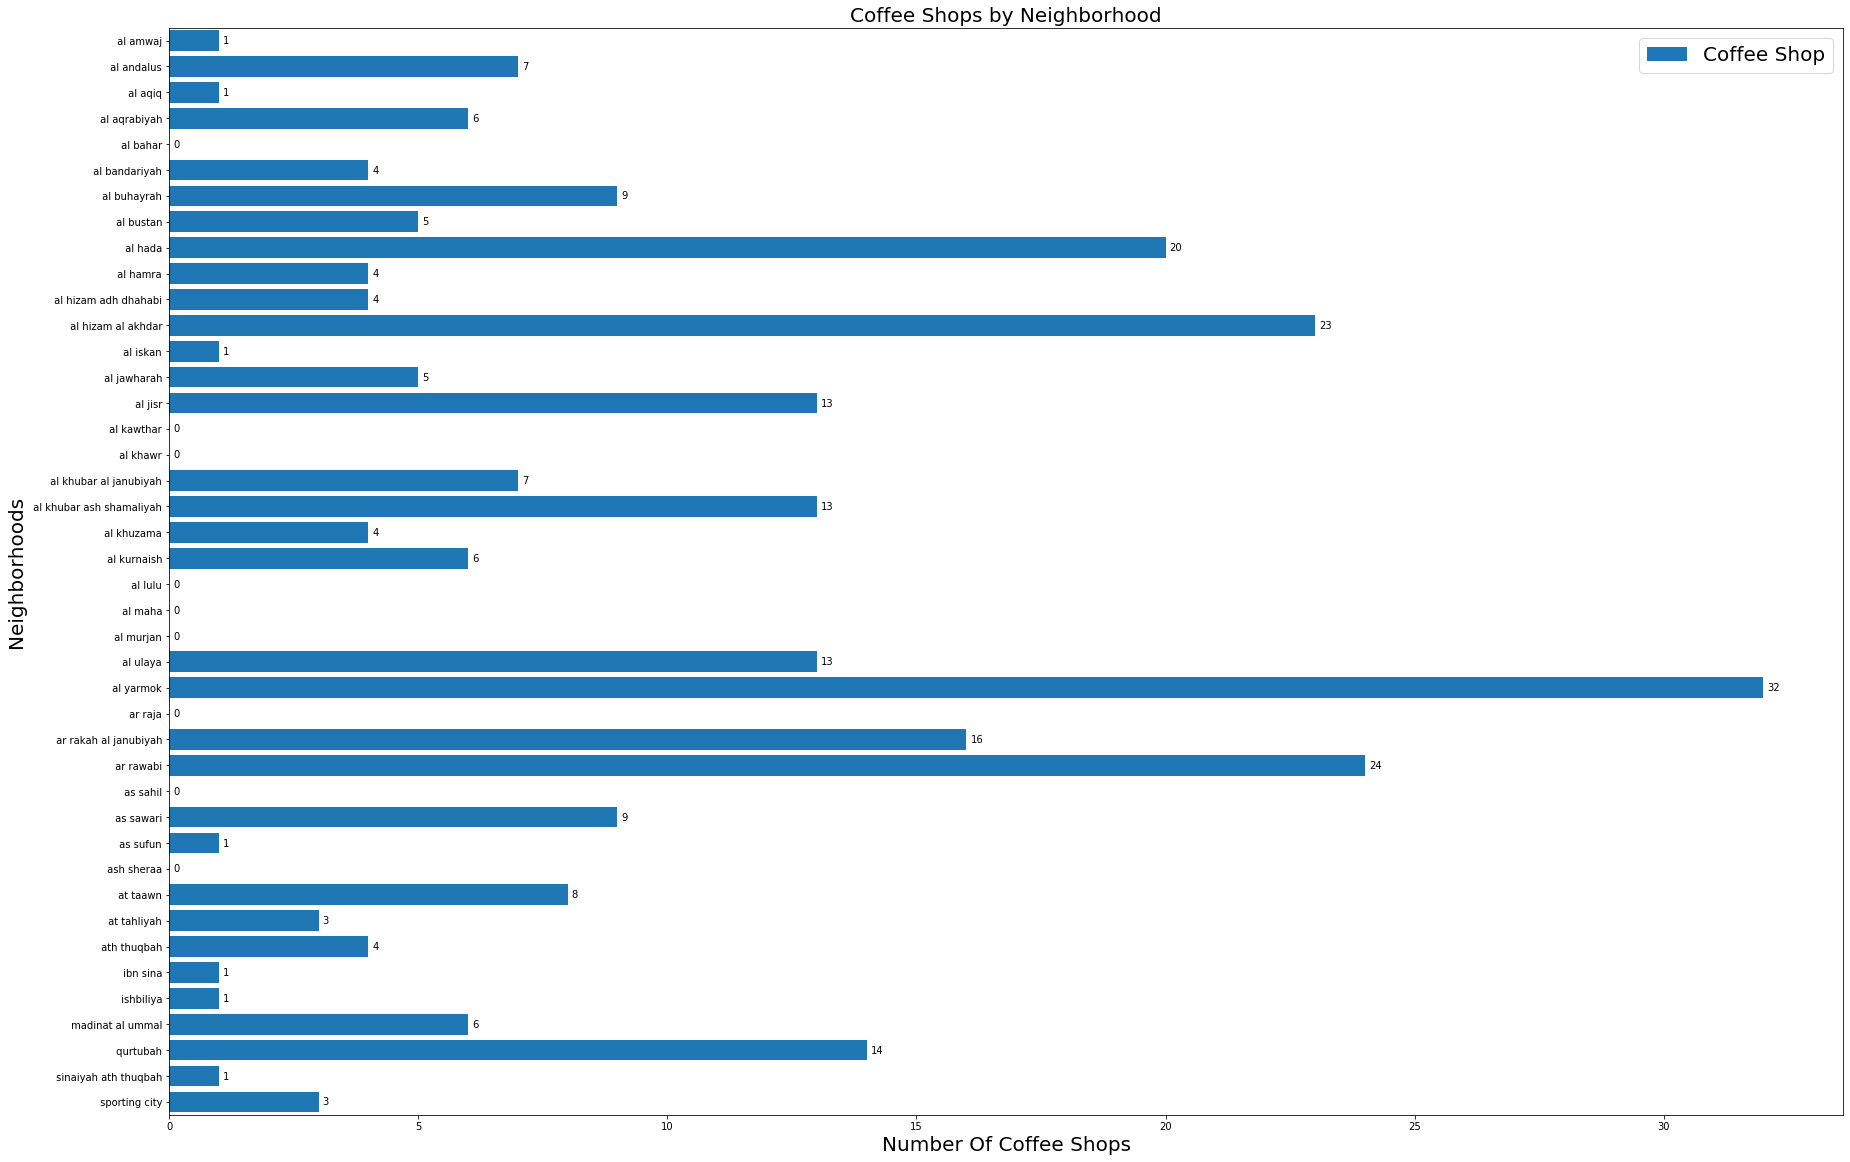

In [45]:
ax=pivot[['Coffee Shop']].plot(kind='barh',figsize=(30,20),stacked=True)
plt.legend( prop={'size': 20})

plt.title('Coffee Shops by Neighborhood',size=20)
tick_idx = plt.yticks()[0]
N_labels = pivot.Neighborhood[tick_idx].values
ax.yaxis.set_ticklabels(N_labels)
plt.ylabel('Neighborhoods',size=20)
plt.xlabel('Number Of Coffee Shops',size=20)
# set individual bar lables using above list
horizontal_bars = ax.barh(pivot['Neighborhood'], pivot['Café']+pivot['Coffee Shop'],  align="center")
value_format = "{}"  # displaying values as percentage with one fractional digit
label_bars(ax, horizontal_bars, value_format)

# invert for largest on top 
ax.invert_yaxis()
plt.show()

Now let us take a look at the burger joints in Al Khobar

Text(0.5, 0, 'Number Of American Restaurants')

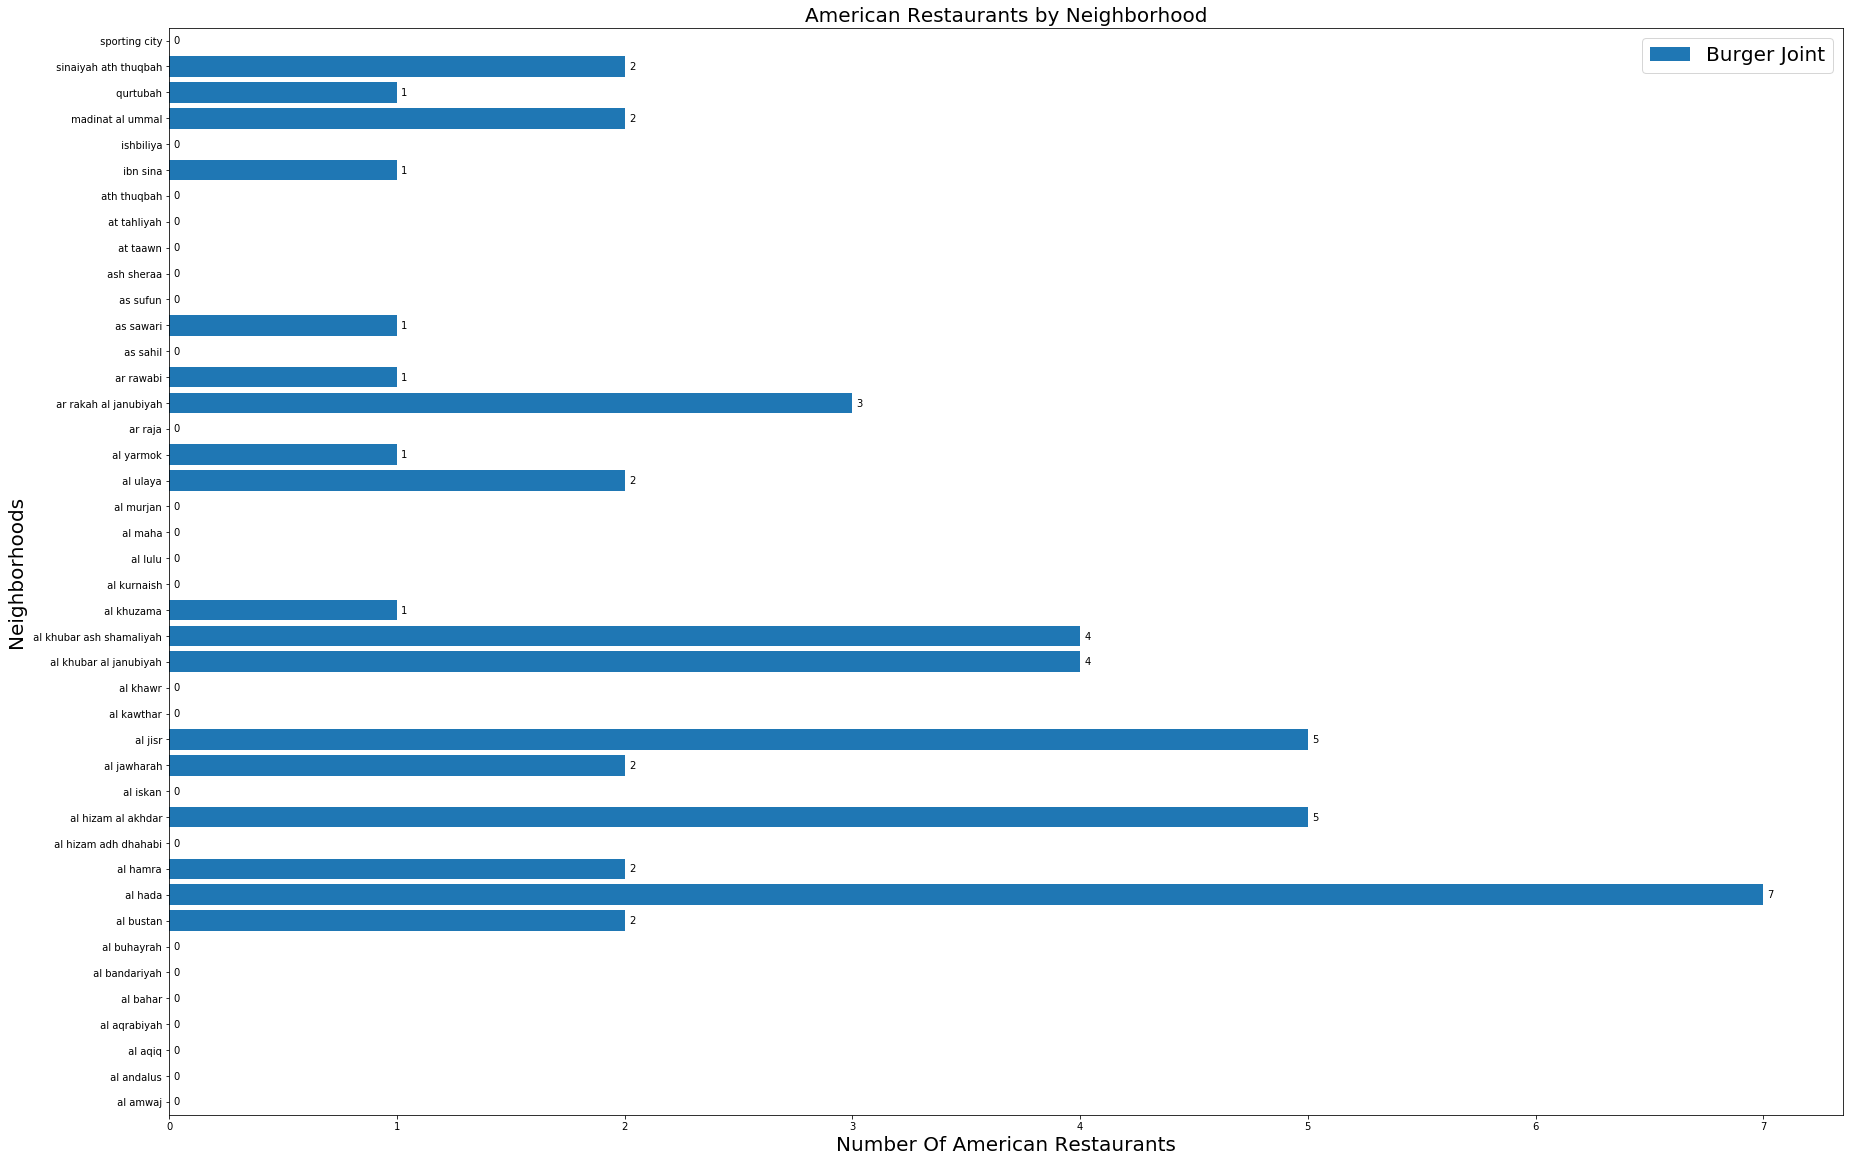

In [46]:
ax=pivot[['Burger Joint']].plot(kind='barh',figsize=(30,20),stacked=True)
plt.legend( prop={'size': 20})
plt.title('American Restaurants by Neighborhood',size=20)
tick_idx = plt.yticks()[0]
N_labels = pivot.Neighborhood[tick_idx].values
ax.yaxis.set_ticklabels(N_labels)
horizontal_bars = ax.barh(pivot['Neighborhood'], pivot['Burger Joint']+pivot['American Restaurant'],  align="center")
value_format = "{}"  # displaying values as percentage with one fractional digit
label_bars(ax, horizontal_bars, value_format)
plt.ylabel('Neighborhoods',size=20)
plt.xlabel('Number Of American Restaurants',size=20)

Now let us explore everybody’s restaurant. Sandwiches are very popular here especially shawarma places. 

Text(0.5, 0, 'Number Of Sandwich Places')

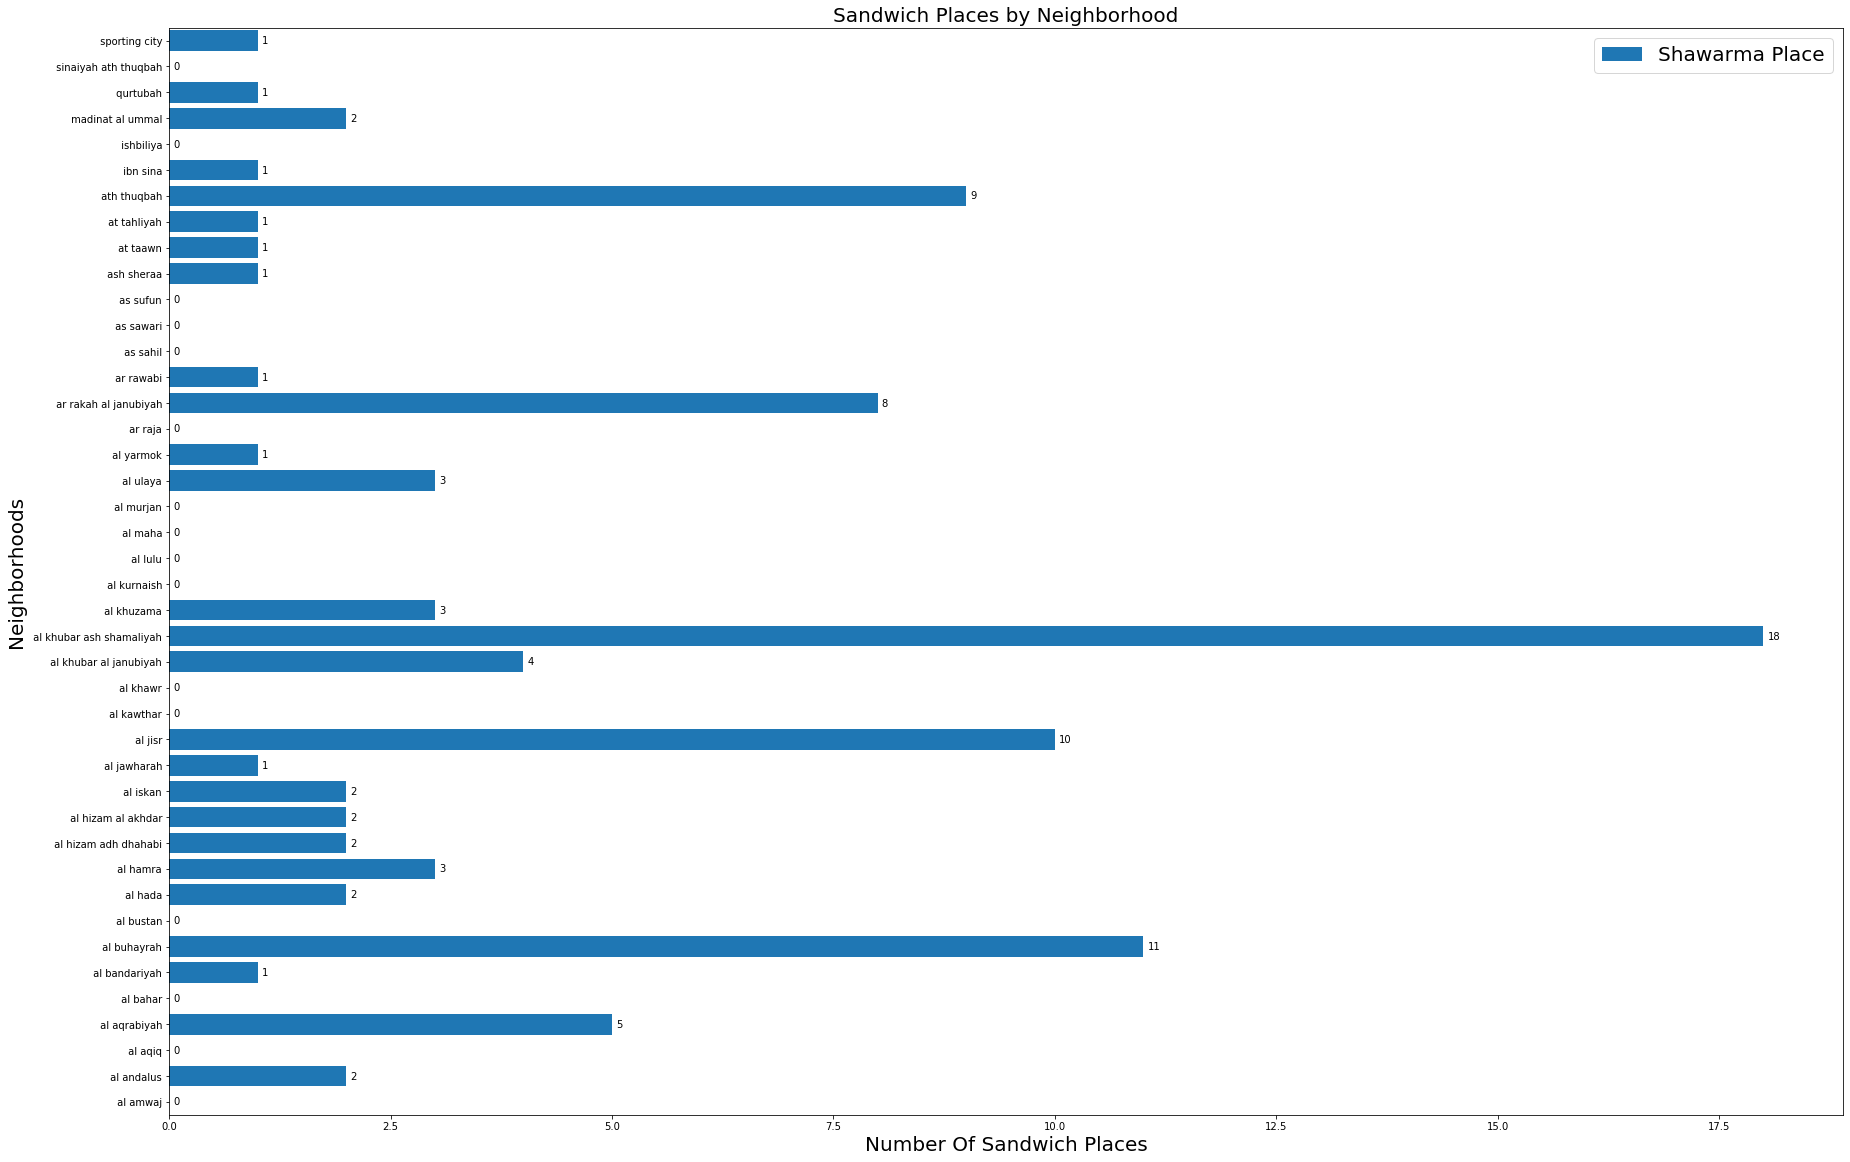

In [47]:
ax=pivot[['Shawarma Place']].plot(kind='barh',figsize=(30,20),stacked=True)
plt.legend( prop={'size': 20})
plt.title('Sandwich Places by Neighborhood',size=20)
tick_idx = plt.yticks()[0]
N_labels = pivot.Neighborhood[tick_idx].values
ax.yaxis.set_ticklabels(N_labels)
horizontal_bars = ax.barh(pivot['Neighborhood'],pivot['Shawarma Place']+ pivot['Turkish Restaurant']+pivot['Middle Eastern Restaurant']+pivot['Kebab Restaurant']+pivot['Falafel Restaurant']+pivot['Doner Restaurant'],  align="center")
value_format = "{}"  # displaying values as percentage with one fractional digit
label_bars(ax, horizontal_bars, value_format)
plt.ylabel('Neighborhoods',size=20)
plt.xlabel('Number Of Sandwich Places',size=20)

Now let us plot them all together on a map.

In [123]:
# create map of Manhattan using latitude and longitude values
from folium.plugins import FastMarkerCluster
import branca.colormap as cm
latitude=26.2172
longitude=50.1971
map_khobar = folium.Map(location=[latitude, longitude], zoom_start=11)
colour=cm.linear.YlOrRd_04
# add markers to map
FastMarkerCluster(data=list(zip(unique_demand['Venue Latitude'].values, unique_demand['Venue Longitude'].values)),popups=unique_demand['Venue Category']+' \n'+unique_demand['Venue']).add_to(map_khobar)
folium.LayerControl().add_to(map_khobar)
for lat, lng, label in zip(unique_demand['Venue Latitude'], unique_demand['Venue Longitude'], unique_demand['Venue Category']+unique_demand['Venue']):
    label = folium.Popup(label, parse_html=False)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colour(id(unique_demand[['Venue Category']])),
        fill=False,
        #fill_color=colour(id(unique_demand[['Venue Category']])),
        fill_opacity=0.3,
        parse_html=True).add_to(map_khobar) 

#mc = MarkerCluster()
map_khobar

The map looks a bit missy. Let us filter out some places like coffee shops and plot those on the map.

In [122]:
# create map of Manhattan using latitude and longitude values
from folium.plugins import FastMarkerCluster
import branca.colormap as cm
latitude=26.2172
longitude=50.1971

df_coffee=unique_demand['Venue Category'].isin(['Café' ,'Coffee Shop'])
df_coffee=unique_demand[df_coffee]
map_khobar = folium.Map(location=[latitude, longitude], zoom_start=11)
colour=cm.linear.YlOrRd_04
# add markers to map

for lat, lng, label in zip(df_coffee['Venue Latitude'], df_coffee['Venue Longitude'], df_coffee['Venue Category']+df_coffee['Venue']):
    label = folium.Popup(label, parse_html=False)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colour(id(df_coffee[['Venue Category']])),
        fill=False,
        #fill_color=colour(id(unique_demand[['Venue Category']])),
        fill_opacity=0.3,
        parse_html=True).add_to(map_khobar) 

#mc = MarkerCluster()
map_khobar

Now let us explore the burger joints in the city.

In [124]:
# create map of Manhattan using latitude and longitude values
from folium.plugins import FastMarkerCluster
import branca.colormap as cm
latitude=26.2172
longitude=50.1971
df_burger=unique_demand['Venue Category'].isin(['Burger Joint' ,'American Restaurant'])
df_burger=unique_demand[df_burger]
map_khobar = folium.Map(location=[latitude, longitude], zoom_start=11)
colour=cm.linear.YlOrRd_04
# add markers to map

for lat, lng, label in zip(df_burger['Venue Latitude'], df_burger['Venue Longitude'], df_burger['Venue Category']+df_burger['Venue']):
    label = folium.Popup(label, parse_html=False)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colour(id(df_burger[['Venue Category']])),
        fill=False,
        #fill_color=colour(id(unique_demand[['Venue Category']])),
        fill_opacity=0.3,
        parse_html=True).add_to(map_khobar) 

#mc = MarkerCluster()
map_khobar

Now let us explore the sandwich places in Al Khobar.

In [125]:
# create map of Manhattan using latitude and longitude values
from folium.plugins import FastMarkerCluster
import branca.colormap as cm
latitude=26.2172
longitude=50.1971
df_sandwich=unique_demand['Venue Category'].isin(['Shawarma Place' ,
                                        'Turkish Restaurant' , 'Middle Eastern Restaurant' , 'Kebab Restaurant' ,
                                        'Falafel Restaurant' , 'Doner Restaurant']) 
df_sandwich=unique_demand[df_sandwich]
map_khobar = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map

for lat, lng, label in zip(df_sandwich['Venue Latitude'], df_sandwich['Venue Longitude'], df_sandwich['Venue Category']+df_sandwich['Venue']):
    label = folium.Popup(label, parse_html=False)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=False,
        #fill_color=colour(id(unique_demand[['Venue Category']])),
        fill_opacity=0.3,
        parse_html=True).add_to(map_khobar) 

#mc = MarkerCluster()
map_khobar


Now let us look at the most popular venues in each neighborhood.

In [731]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [734]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pivot['Neighborhood']

for ind in np.arange(pivot.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pivot.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood      1st Most Common Venue  \
0                    al amwaj                      Beach   
1                  al andalus                Coffee Shop   
2                     al aqiq                      Beach   
3                al aqrabiyah                       Café   
4                    al bahar                        Bay   
5               al bandariyah                Coffee Shop   
6                 al buhayrah  Middle Eastern Restaurant   
7                   al bustan                Coffee Shop   
8                     al hada                 Food Truck   
9                    al hamra                Coffee Shop   
10       al hizam adh dhahabi                Coffee Shop   
11         al hizam al akhdar                Coffee Shop   
12                   al iskan              Auto Workshop   
13                al jawharah                       Café   
14                    al jisr                Coffee Shop   
15                 al kawthar                       Farm   
16                   al khawr                      Beach   
17     al khubar al janubiyah                      Hotel   
18   al khubar ash shamaliyah  Middle Eastern Restaurant   
19                 al khuzama                  Juice Bar   
20                al kurnaish                Coffee Shop   
21                    al lulu                 Hookah Bar   
22                    al maha                 Hookah Bar   
23                  al murjan                      Beach   
24                   al ulaya                       Café   
25                  al yarmok                Coffee Shop   
26                    ar raja                     Lounge   
27      ar rakah al janubiyah                Coffee Shop   
28                  ar rawabi                Coffee Shop   
29                   as sahil                 Restaurant   
30                  as sawari                       Café   
31                   as sufun              Boat or Ferry   
32                 ash sheraa                 Hookah Bar   
33                   at taawn                 Hookah Bar   
34                at tahliyah                       Café   
35                ath thuqbah  Middle Eastern Restaurant   
36                   ibn sina              Auto Workshop   
37                  ishbiliya                   Creperie   
38           madinat al ummal                Coffee Shop   
39                   qurtubah                       Café   
40       sinaiyah ath thuqbah               Burger Joint   
41              sporting city                      Hotel   

            2nd Most Common Venue      3rd Most Common Venue  \
0                     Coffee Shop                Supermarket   
1            Gym / Fitness Center                      Trail   
2                          Resort                Coffee Shop   
3                          Bakery          Indian Restaurant   
4               Outdoor Sculpture                        ATM   
5                    Dessert Shop               Outlet Store   
6                     Coffee Shop                       Café   
7                            Café               Burger Joint   
8                            Café                Coffee Shop   
9            Fast Food Restaurant               Burger Joint   
10                           Café               Dessert Shop   
11                   Dessert Shop                       Café   
12                          Beach                  Juice Bar   
13                    Coffee Shop                Pastry Shop   
14                           Café               Burger Joint   
15                     Campground                       Park   
16                          River                        ATM   
17                         Bakery                Coffee Shop   
18                    Coffee Shop             Breakfast Spot   
19                           Café                Pizza Place   
20                           Café                   Tea Room   
21                          

Now let us clean up the price and area of the supply data (Aqar data)

In [126]:
import re
unique_supply=pd.read_csv('Aqar_Unique_Demand.csv')
unique_supply.rename({' nameEn_x':'Neighborhood',' nameAr_x':'Neighborhood Arabic',' nameEn_y':'City',' nameAr_y':'City Arabic'},axis=1,inplace=True)
for i,k in enumerate(unique_supply['Price']):
    unique_supply['Price'][i]=re.findall(r'\d+',k)
    unique_supply.loc[i,'Price']=''.join(unique_supply['Price'][i])
for i,k in enumerate(unique_supply['Area']):
    unique_supply['Area'][i]= re.findall(r'\d+',k)
    unique_supply.loc[i,'Area']=''.join(unique_supply['Area'][i])
unique_supply['Price Per Meter']=unique_supply['Price'].astype(float)/unique_supply['Area'].astype(float)
unique_supply.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
unique_supply.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0.1.1                                            Address  \
0               0  محل للإيجار في الشارع الثلاثين ، حي الخبر الجن...   
1               1  محل للإيجار في شارع الامير فهد ، حي الخبر الشم...   
2               2                     محل للإيجار في شارع بدر, الخبر   
3               3        محل للإيجار في الشارع الرابع, الثقبة, الخبر   
4               4  محل للإيجار في شارع صلاح الدين االايوبي ، حي ا...   

  Neighborhood Arabic  Price Area  score    id               Neighborhood  \
0      الخبر الجنوبية  15000   40    100  1300     al khubar al janubiyah   
1      الخبر الشمالية  95000   96    100  1297   al khubar ash shamaliyah   
2               البحر  20000   25     83  1412                   al bahar   
3              الثقبة  22000   43    100  1310                ath thuqbah   
4             الاندلس  40000  900     88  1306                 al andalus   

   cityId      neLat      neLng      swLat      swlng City Arabic        City  \
0      31  26.283358  50.218284  26.262890  50.197525       الخبر   Al Khubar   
1      31  26.302165  50.222627  26.278644  50.205284       الخبر   Al Khubar   
2      31  26.366470  50.234472  26.337688  50.206853       الخبر   Al Khubar   
3      31  26.289767  50.205283  26.258170  50.176784       الخبر   Al Khubar   
4      31  26.333811  50.191960  26.312652  50.179595       الخبر   Al Khubar   

    provinceId    avg_lat    avg_lng  sigma_lat  sigma_lng  unique_lat  \
0         13.0  26.273124  50.207904   0.003411   0.003460   26.274375   
1         13.0  26.290404  50.213956   0.003920   0.002890   26.292640   
2         13.0  26.352079  50.220662   0.004797   0.004603   26.353508   
3         13.0  26.273968  50.191034   0.005266   0.004750   26.281174   
4         13.0  26.323231  50.185778   0.003527   0.002061   26.319677   

   unique_lng  rented  Price Per Meter  
0   50.212278       0       375.000000  
1   50.217048       0       989.583333  
2   50.215697       0       800.000000  
3   50.187833       0       511.627907  
4   50.186475       0        44.444444

Let us explore the average price per meter

In [127]:
price_per_meter=unique_supply[['Price Per Meter','Neighborhood']]
avg_meter_price=price_per_meter.groupby('Neighborhood').mean()
avg_meter_price

Price Per Meter
Neighborhood                              
 al andalus                     447.222222
 al aqiq                        520.000000
 al aqrabiyah                   751.670465
 al bahar                       598.871307
 al bandariyah                  490.909091
 al hizam adh dhahabi          1081.081081
 al hizam al akhdar            1662.225774
 al jisr                        558.555917
 al kawthar                    1054.834055
 al khubar al janubiyah         513.006641
 al khubar ash shamaliyah       570.736378
 al khuzama                     750.412871
 al kurnaish                   1325.000000
 al ulaya                      1111.111111
 al yarmok                      977.272727
 ar rakah al janubiyah          818.059849
 as sahil                       292.709751
 as sawari                      857.142857
 ash sheraa                     657.142857
 at taawn                       446.559905
 at tahliyah                     34.161491
 ath thuqbah                    462.102478
 madinat al ummal               684.262038
 qurtubah                       300.000000
 sinaiyah ath thuqbah           612.607164

Text(0.5, 0, 'Price Per Meter')

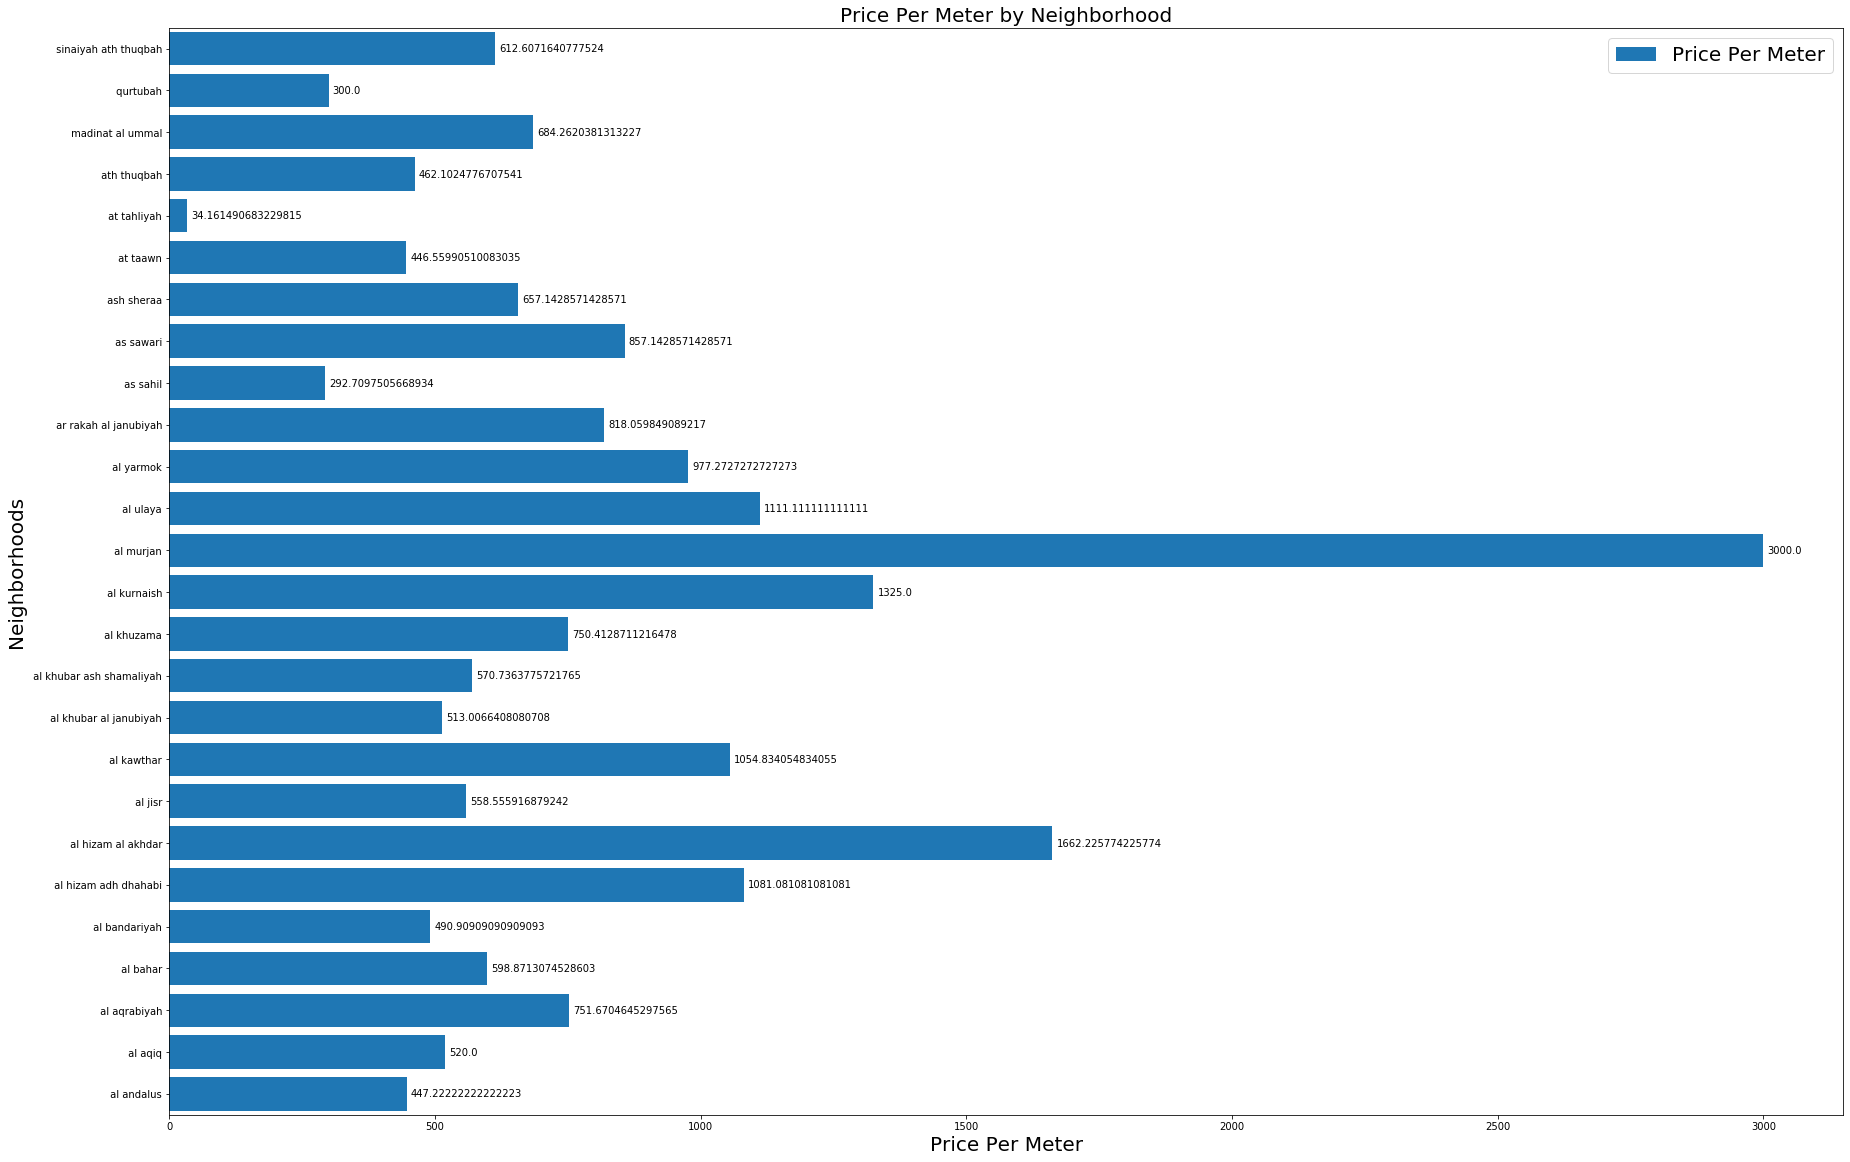

In [55]:
ax=avg_meter_price.plot(kind='barh',figsize=(30,20),stacked=True)
plt.legend( prop={'size': 20})
plt.title('Price Per Meter by Neighborhood',size=20)
tick_idx = plt.yticks()[0]
N_labels = avg_meter_price.index[tick_idx].values
ax.yaxis.set_ticklabels(N_labels)
horizontal_bars = ax.barh(avg_meter_price.index,avg_meter_price['Price Per Meter'],  align="center")
value_format = "{}" 
label_bars(ax, horizontal_bars, value_format)
plt.ylabel('Neighborhoods',size=20)
plt.xlabel('Price Per Meter',size=20)

Investigating the highest which is Al Murjan, which is not that expensive, yielded that the place is in Adh Dhahran which is outside Al Khobar so we can drop it.

In [82]:

unique_supply.drop(index=231,axis=0,inplace=True)

Let us look at the count of the listings per neighborhood

In [77]:
unique_supply['choropleth']=1
count=unique_supply[['choropleth','Neighborhood']].groupby('Neighborhood').sum()
count.rename({'choropleth':'Count'},axis=1,inplace=True)
count

Count
Neighborhood                    
 al andalus                    2
 al aqiq                       1
 al aqrabiyah                 23
 al bahar                     10
 al bandariyah                 2
 al hizam adh dhahabi          1
 al hizam al akhdar            5
 al jisr                      14
 al kawthar                    3
 al khubar al janubiyah       33
 al khubar ash shamaliyah     88
 al khuzama                   12
 al kurnaish                   2
 al ulaya                      1
 al yarmok                     2
 ar rakah al janubiyah         6
 as sahil                      4
 as sawari                     1
 ash sheraa                    4
 at taawn                      2
 at tahliyah                   1
 ath thuqbah                  38
 madinat al ummal             12
 qurtubah                      1
 sinaiyah ath thuqbah          5

Text(0.5, 0, 'Listing Count')

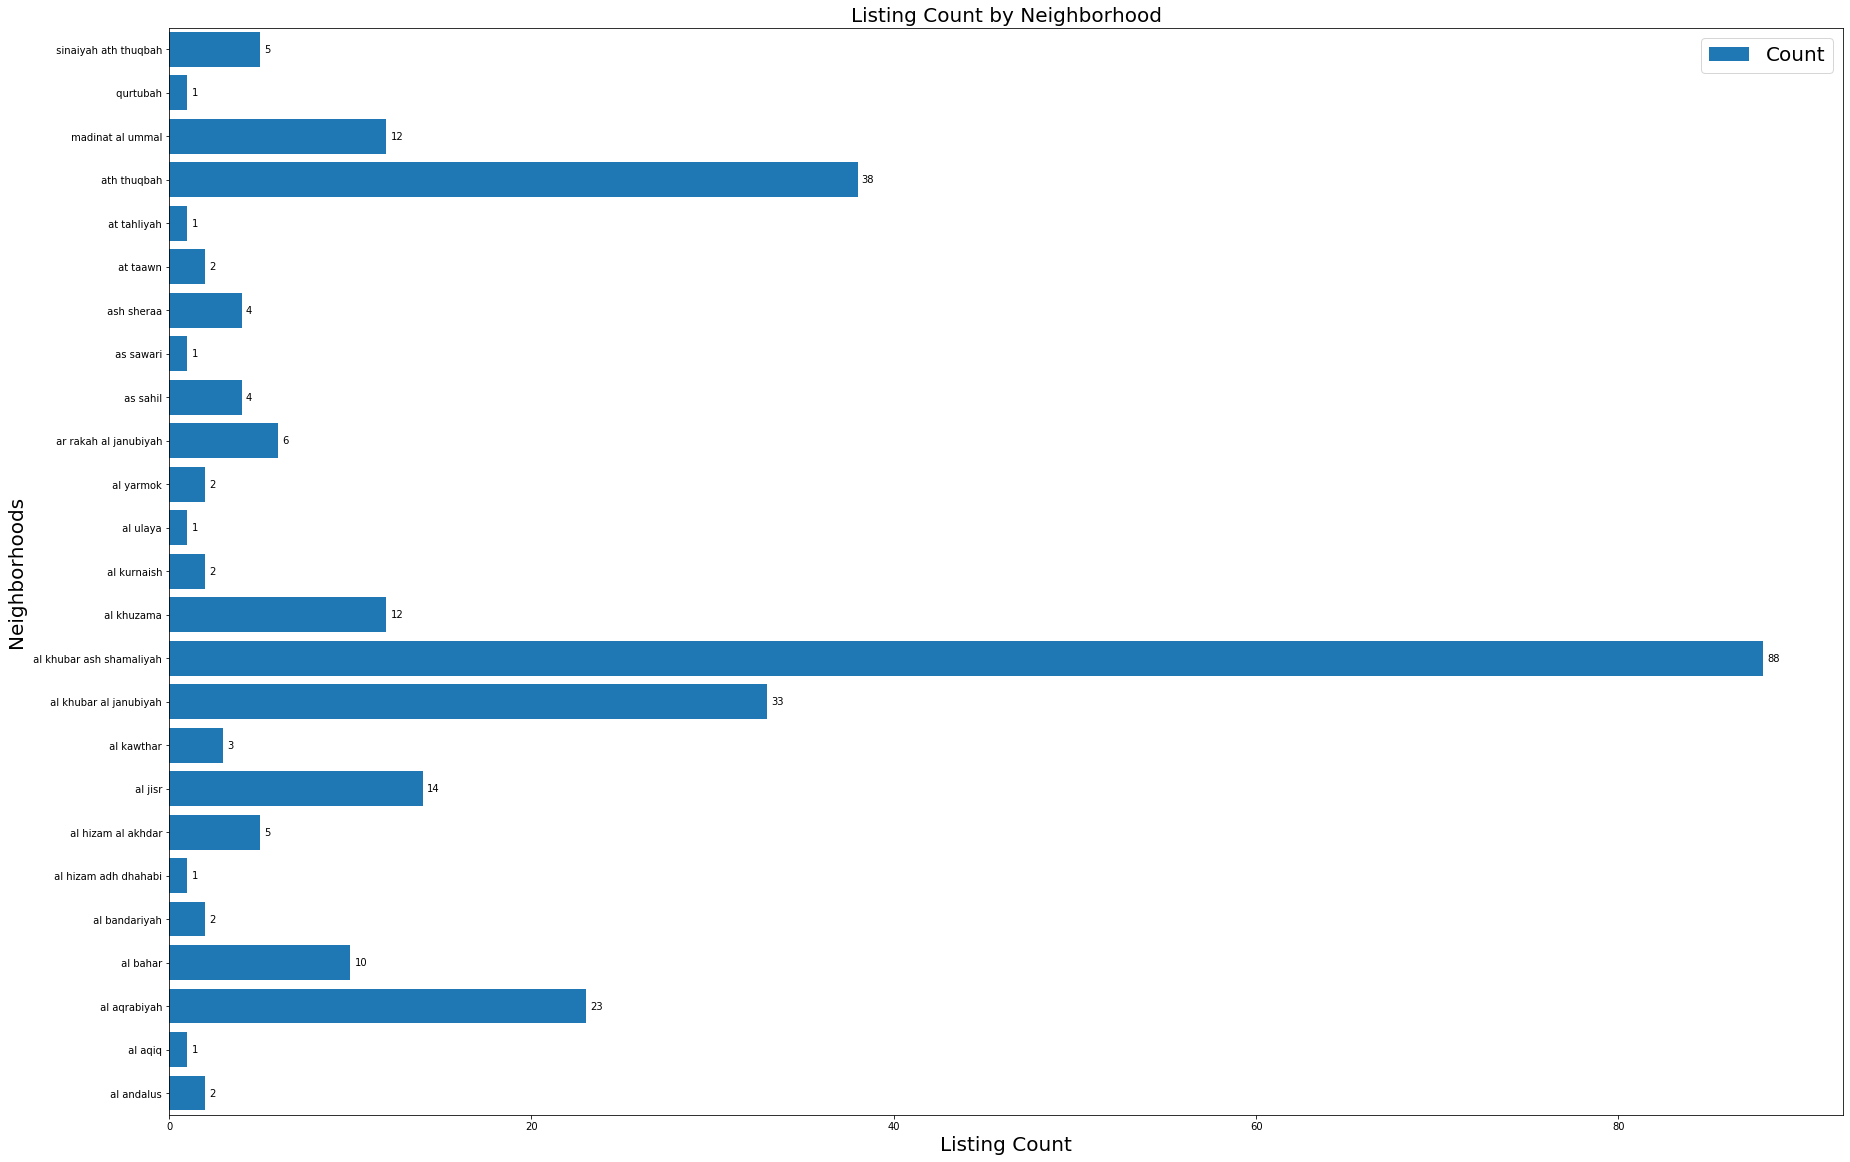

In [78]:
ax=count.plot(kind='barh',figsize=(30,20),stacked=True)
plt.legend( prop={'size': 20})
plt.title('Listing Count by Neighborhood',size=20)
tick_idx = plt.yticks()[0]
N_labels = count.index[tick_idx].values
ax.yaxis.set_ticklabels(N_labels)
horizontal_bars = ax.barh(count.index,count['Count'],  align="center")
value_format = "{}"  # displaying values as percentage with one fractional digit
label_bars(ax, horizontal_bars, value_format)
plt.ylabel('Neighborhoods',size=20)
plt.xlabel('Listing Count',size=20)

Now, let us visualize it.

In [75]:


# create map of Manhattan using latitude and longitude values
from folium.plugins import FastMarkerCluster
import branca.colormap as cm
latitude=26.2172
longitude=50.1971
map_khobar = folium.Map(location=[latitude, longitude], zoom_start=11)
colour=cm.linear.YlOrRd_04
# add markers to map
FastMarkerCluster(data=list(zip(unique_supply['unique_lat'].values, unique_supply['unique_lng'].values)),popups=unique_supply['Address']+' \n'+unique_supply['Neighborhood']).add_to(map_khobar)
folium.LayerControl().add_to(map_khobar)
for lat, lng, label in zip(unique_supply['unique_lat'], unique_supply['unique_lng'], unique_supply['Address']+unique_supply['Neighborhood']):
    label = folium.Popup(label, parse_html=False)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colour(id(unique_supply[['Neighborhood']])),
        fill=False,
        #fill_color=colour(id(unique_demand[['Venue Category']])),
        fill_opacity=0.3,
        parse_html=True).add_to(map_khobar) 

#mc = MarkerCluster()
map_khobar

## Data Modeling
We first split the data then we model it using the KNN nearest neighbor, logistic regression, and SVM.

In [176]:
from sklearn.model_selection import train_test_split
mean1=X.mean()
std=X.std()
X1 = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split( X1, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ( mean1,  std)

Train set: (1369, 2) (1369, 1)
Test set: (343, 2) (343, 1)
lat    26.280219
lng    50.198082
dtype: float64 lat    0.052060
lng    0.017831
dtype: float64


In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
import sklearn
para={'n_neighbors': range(1,Ks),
     'weights':['uniform','distance'],
     'metric':['euclidean','manhattan']}
    
    #Train Model and Predict  
neigh = KNeighborsClassifier()
grid=sklearn.model_selection.GridSearchCV(neigh,para)
grid.fit(X_train,y_train)
yhat=grid.predict(X_test)
mean_acc= metrics.accuracy_score(y_test, yhat)
jaccard_sim= metrics.jaccard_similarity_score(y_test, yhat)
f1=metrics.f1_score(y_test, yhat)
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expect

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

0.8862973760932945

In [104]:
print(mean_acc,jaccard_sim,f1)
grid.best_estimator_

0.8862973760932945 0.8862973760932945 0.934453781512605


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [105]:
from 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.68      0.49      0.57        53
           1       0.91      0.96      0.93       290

    accuracy                           0.89       343
   macro avg       0.80      0.72      0.75       343
weighted avg       0.88      0.89      0.88       343

Confusion matrix, without normalization
[[ 26  27]
 [ 12 278]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


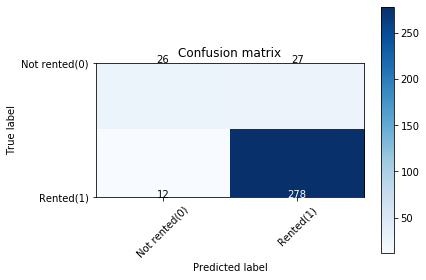

In [108]:
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
yhat=neigh.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (metrics.classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not rented(0)','Rented(1)'],normalize= False,  title='Confusion matrix')

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn
LR = LogisticRegression()
para={'penalty' : [ 'l1','l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : [ 'liblinear']}
log_reg=sklearn.model_selection.GridSearchCV(LR,para)
log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00e-04, 2.64e-04, 6.95e-04, 1.83e-03, 4.83e-03, 1.27e-02,
       3.36e-02, 8.86e-02, 2.34e-01, 6.16e-01, 1.62e+00, 4.28e+00,
       1.13e+01, 2.98e+01, 7.85e+01, 2.07e+02, 5.46e+02, 1.44e+03,
       3.79e+03, 1.00e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
  

In [111]:
log_reg.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
yhat=log_reg.predict(X_test)

In [113]:
yhat_proba=log_reg.predict_log_proba(X_test)

In [114]:

mean=metrics.accuracy_score(y_test, yhat)
jaccard_sim = metrics.jaccard_similarity_score(y_test, yhat)
f1=metrics.f1_score(y_test, yhat)
print(mean_acc,jaccard_sim,f1)

0.8862973760932945 0.8454810495626822 0.9162717219589257


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [115]:

print(mean,jaccard_sim,f1)

0.8454810495626822 0.8454810495626822 0.9162717219589257


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.85      1.00      0.92       290

    accuracy                           0.85       343
   macro avg       0.42      0.50      0.46       343
weighted avg       0.71      0.85      0.77       343

Confusion matrix, without normalization
[[  0  53]
 [  0 290]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


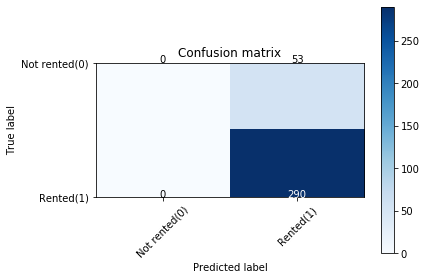

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not rented(0)','Rented(1)'],normalize= False,  title='Confusion matrix')

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': [ 'linear', 'poly', 'rbf', 'sigmoid' ]}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.838, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.838, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.840, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.840, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] .........

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .. C=0.01, gamma=0.001, kernel=linear, score=0.840, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=poly ................................
[CV] .... C=0.01, gamma=0.001, kernel=poly, score=0.838, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=poly ................................
[CV] .... C=0.01, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=poly ................................
[CV] .... C=0.01, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.838, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=sigmoid .............................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.838, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.838, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.840, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.840, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.838, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=0.1, gamma=0.001, kernel=sigmoid, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 


[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=1, gamma=1, kernel=poly, score=0.838, total=   1.1s
[CV] C=1, gamma=1, kernel=poly .......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=1, gamma=1, kernel=poly, score=0.840, total=   2.8s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.840, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.838, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.744, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.728, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.838, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.840, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.838, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.840, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.840, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.838, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.838, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.840, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ........ C=10, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=10, gamma=1, kernel=poly, score=0.838, total= 2.3min
[CV] C=10, gamma=1, kernel=poly ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=10, gamma=1, kernel=poly, score=0.840, total=  18.7s
[CV] C=10, gamma=1, kernel=poly ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=10, gamma=1, kernel=poly, score=0.840, total=   2.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.845, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=1, kernel=sigmoid, score=0.733, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=1, kernel=sigmoid, score=0.719, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=1, kernel=sigmoid, score=0.738, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.840, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ........ C=10, gamma=0.1, kernel=poly, score=0.838, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ........ C=10, gamma=0.1, kernel=poly, score=0.840, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ........ C=10, gamma=0.1, kernel=poly, score=0.840, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.838, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.840, total=   0.1s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.820, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.838, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.840, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.840, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.838, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.840, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.840, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .... C=10, gamma=0.001, kernel=linear, score=0.840, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.840, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ...... C=10, gamma=0.001, kernel=poly, score=0.838, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ...... C=10, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ...... C=10, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.838, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ....... C=100, gamma=1, kernel=linear, score=0.838, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.838, total= 2.6min
[CV] C=100, gamma=1, kernel=poly .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=100, gamma=1, kernel=poly, score=0.840, total= 2.0min
[CV] C=100, gamma=1, kernel=poly .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=100, gamma=1, kernel=poly, score=0.840, total= 2.7min
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.840, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.842, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.844, total=   0.1s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.733, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.717, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.738, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.838, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.840, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.838, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.840, total=   0.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.840, total=   0.3s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=100, gamma=0.1, kernel=sigmoid, score=0.748, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=100, gamma=0.1, kernel=sigmoid, score=0.748, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=100, gamma=0.1, kernel=sigmoid, score=0.730, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.838, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.840, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.840, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.840, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.838, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.840, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.831, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.838, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.840, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.840, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ..... C=100, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.838, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.838, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.840, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.840, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 


[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.838, total= 1.0min
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.840, total= 1.2min
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.840, total= 1.0min
[CV] C=1000, gamma=1, kernel=poly ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1000, gamma=1, kernel=poly, score=0.838, total= 3.5min
[CV] C=1000, gamma=1, kernel=poly ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1000, gamma=1, kernel=poly, score=0.840, total= 2.4min
[CV] C=1000, gamma=1, kernel=poly ....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1000, gamma=1, kernel=poly, score=0.840, total= 3.1min
[CV] C=1000, gamma=1, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.838, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.840, total=   0.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.846, total=   0.2s
[CV] C=1000, gamma=1, kernel=sigmoid .................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=1000, gamma=1, kernel=sigmoid, score=0.733, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] ..... C=1000, gamma=1, kernel=sigmoid, score=0.717, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] ..... C=1000, gamma=1, kernel=sigmoid, score=0.738, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.838, total=  59.4s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.840, total= 1.2min
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.840, total= 1.0min
[CV] C=1000, gamma=0.1, kernel=poly ..................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.1, kernel=poly, score=0.838, total=   5.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.1, kernel=poly, score=0.840, total=   3.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV] ...... C=1000, gamma=0.1, kernel=poly, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.838, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.838, total=   0.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.840, total=   0.7s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV] ... C=1000, gamma=0.1, kernel=sigmoid, score=0.724, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV] ... C=1000, gamma=0.1, kernel=sigmoid, score=0.711, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV] ... C=1000, gamma=0.1, kernel=sigmoid, score=0.727, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.838, total=  59.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.840, total= 1.2min
[CV] C=1000, gamma=0.01, kernel=linear ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.840, total= 1.0min
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] ..... C=1000, gamma=0.01, kernel=poly, score=0.838, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] ..... C=1000, gamma=0.01, kernel=poly, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] ..... C=1000, gamma=0.01, kernel=poly, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.838, total=   0.5s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.840, total=   0.5s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.840, total=   0.5s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] .. C=1000, gamma=0.01, kernel=sigmoid, score=0.838, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] .. C=1000, gamma=0.01, kernel=sigmoid, score=0.840, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.01, kernel=sigmoid, score=0.822, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.838, total=12.5min
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.840, total= 1.2min
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.840, total= 1.0min
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.838, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.838, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.840, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.840, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] . C=1000, gamma=0.001, kernel=sigmoid, score=0.838, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] . C=1000, gamma=0.001, kernel=sigmoid, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] . C=1000, gamma=0.001, kernel=sigmoid, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.838, total= 1.0min
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.840, total= 1.2min
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.840, total= 1.0min
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ... C=1000, gamma=0.0001, kernel=poly, score=0.838, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ... C=1000, gamma=0.0001, kernel=poly, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ... C=1000, gamma=0.0001, kernel=poly, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.838, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [118]:
yhatsvm=grid.predict(X_test)
mean=metrics.accuracy_score(y_test, yhatsvm)
jaccard_sim = metrics.jaccard_similarity_score(y_test, yhatsvm)
f1=metrics.f1_score(y_test, yhatsvm)
print(mean,jaccard_sim,f1)
grid.best_estimator_

0.8483965014577259 0.8483965014577259 0.9174603174603174


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

              precision    recall  f1-score   support

           0       0.67      0.04      0.07        53
           1       0.85      1.00      0.92       290

    accuracy                           0.85       343
   macro avg       0.76      0.52      0.49       343
weighted avg       0.82      0.85      0.79       343

Confusion matrix, without normalization
[[  2  51]
 [  1 289]]


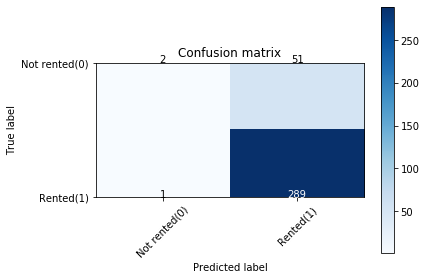

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, yhatsvm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatsvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not rented(0)','Rented(1)'],normalize= False,  title='Confusion matrix')

As you can see the best estimates came from the KNN model, so that is the model that we will use for the whole data

In [1115]:
bestmodel= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [1116]:
bestmodel.fit(X1,Y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

## Conclusion
The best result was obtained by the KNN model as you can see. We first began by wanting a model that predicts whether a location is rentable or not. We now have that model with an accuracy of 85.4% which is pretty good for a data with only location data to predict with. 